In [681]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np

## NUTS2

### View data tendencies by region in Labour data

In [682]:
# Load the data of labour 

labour_NUTS2_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
labour_NUTS2_df.head(100)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,11,Norte,2,2019,119432,Total labour force in agriculture
1,11,Norte,2,2019,93339,Family labour force
2,11,Norte,2,2019,50025,Holder
3,11,Norte,2,2019,28116,Spouse
4,11,Norte,2,2019,15198,Other family members
...,...,...,...,...,...,...
58,30,Região Autónoma da Madeira,2,2019,1927,Other family members
59,30,Região Autónoma da Madeira,2,2019,1538,Non-family labour force
60,30,Região Autónoma da Madeira,2,2019,716,Regular
61,30,Região Autónoma da Madeira,2,2019,766,Non-regular


In [683]:
# Create a list of the region_name

labour_NUTS2_df_list = labour_NUTS2_df['region_name'].unique().tolist()
print(labour_NUTS2_df_list)



['Norte', 'Algarve', 'Centro', 'Área Metropolitana de Lisboa', 'Alentejo', 'Região Autónoma dos Açores ', 'Região Autónoma da Madeira ']


C:\Users\cespe\AppData\Local\Temp\ipykernel_18996\1065381294.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=labour_sum, x='l.value', y='ltn.type_labour', palette='viridis')


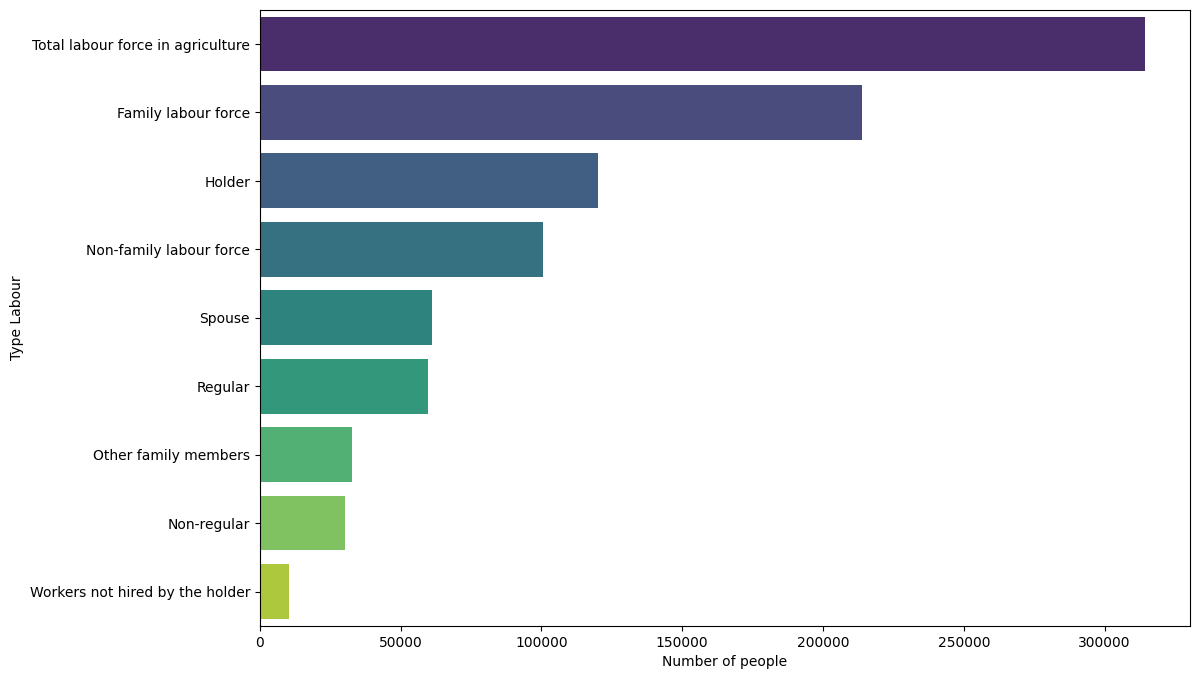

In [684]:

labour_2019_df = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Sumar valores por tipo de labor
labour_sum = labour_2019_df.groupby('ltn.type_labour')['l.value'].sum().reset_index()

# Ordenar los datos para una mejor visualización
labour_sum = labour_sum.sort_values(by='l.value', ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=labour_sum, x='l.value', y='ltn.type_labour', palette='viridis')
plt.xlabel('Number of people')
plt.ylabel('Type Labour')
plt.title('')
plt.show()

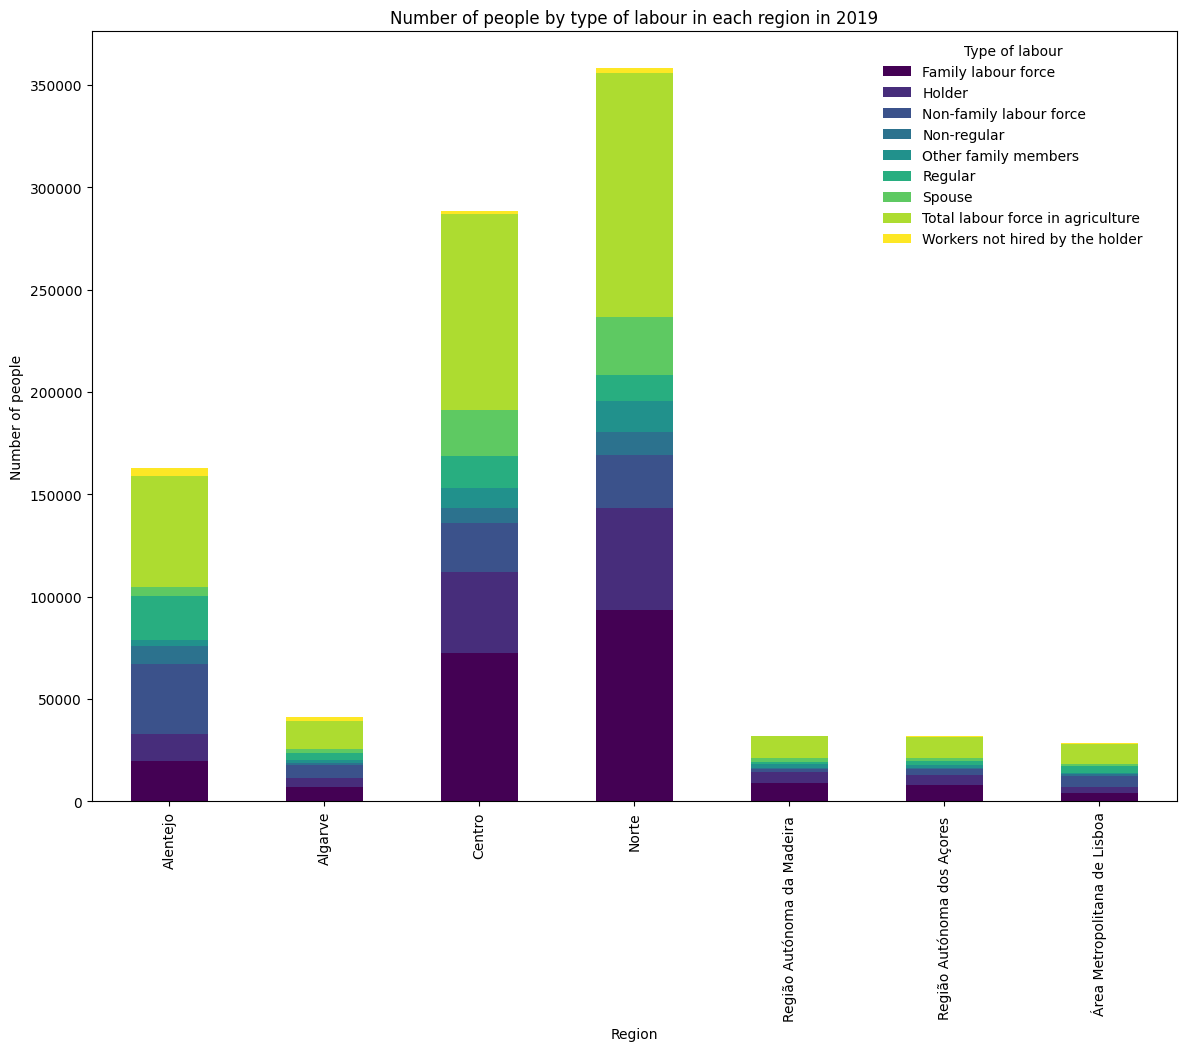

In [685]:
# Sum values by region and type of labour
labour_sum_region = labour_2019_df.groupby(['region_name', 'ltn.type_labour'])['l.value'].sum().unstack().fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
labour_sum_region.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Region')
ax.set_ylabel('Number of people')
ax.set_title('Number of people by type of labour in each region in 2019')

# Customize legend
legend = ax.legend(title='Type of labour', bbox_to_anchor=(0.98, 1), loc='upper right', frameon=False)

plt.show()

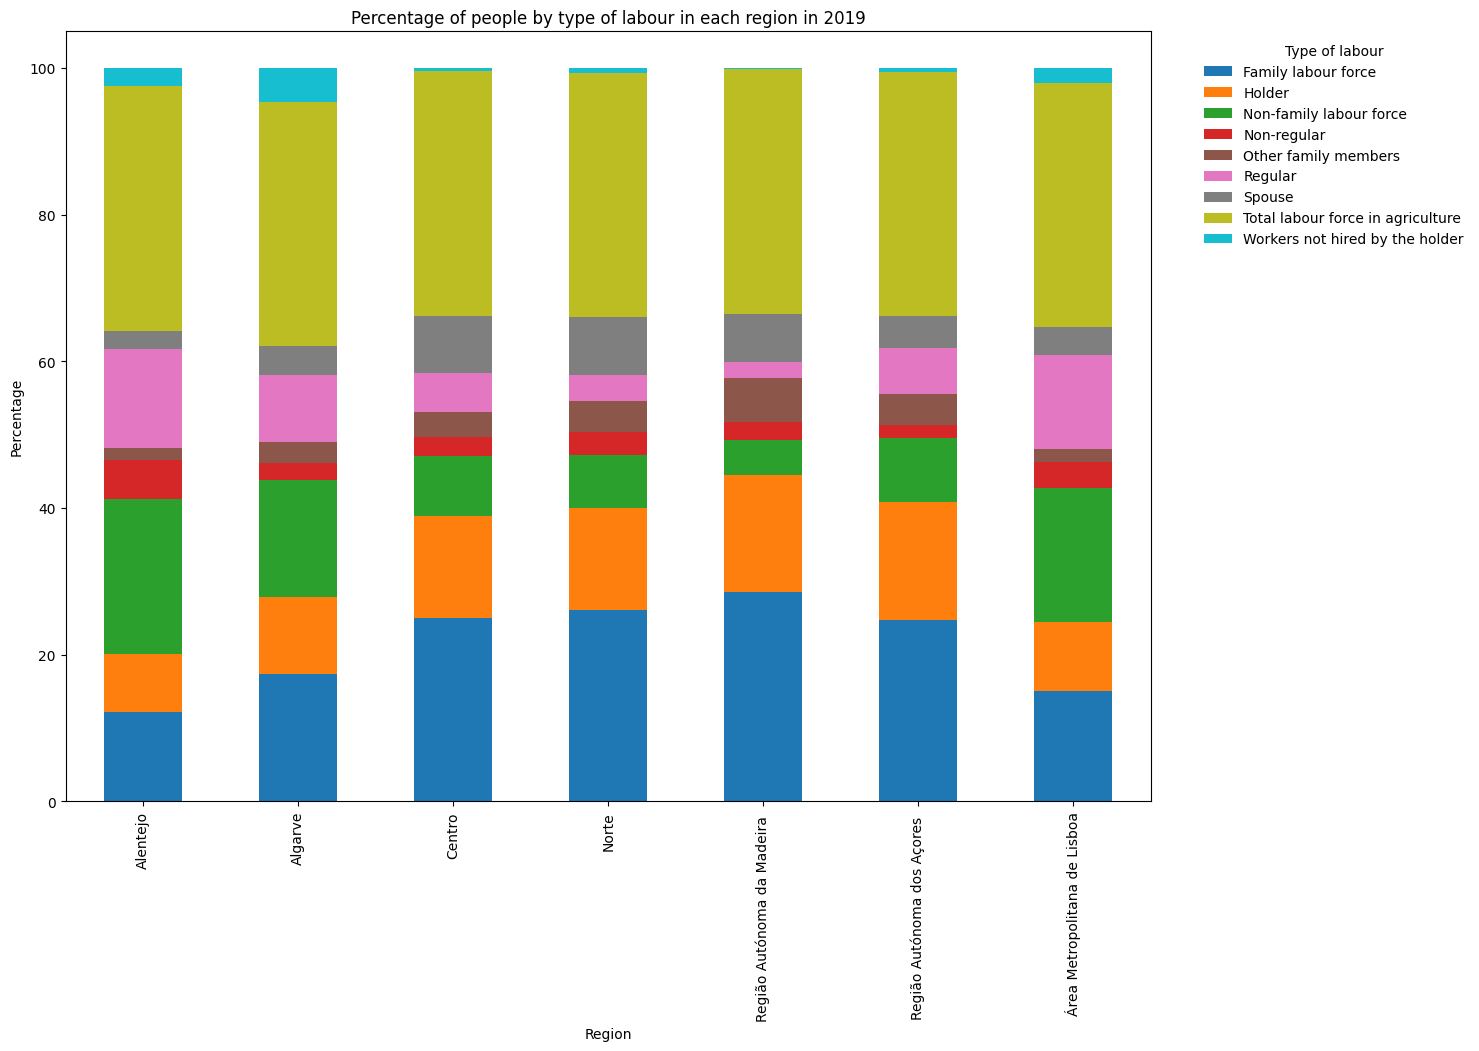

In [686]:

# Calculate the total labor force per region
total_labour_per_region = labour_2019_df.groupby('region_name')['l.value'].transform('sum')

# Calculate the percentage of each labor type within each region
labour_2019_df['percentage'] = (labour_2019_df['l.value'] / total_labour_per_region) * 100

# Pivot the table for easier plotting
labour_pivot = labour_2019_df.pivot_table(values='percentage', index='region_name', columns='ltn.type_labour', fill_value=0)


# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))
labour_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of people by type of labour in each region in 2019')

# Customize legend
legend = ax.legend(title='Type of labour', bbox_to_anchor=(1.3, 1), loc='upper right', frameon=False)

plt.show()

In [687]:
# Verify the calculations of the %
labour_pivot = pd.DataFrame(labour_pivot)
labour_pivot.head()

ltn.type_labour,Family labour force,Holder,Non-family labour force,Non-regular,Other family members,Regular,Spouse,Total labour force in agriculture,Workers not hired by the holder
region_name,,,,,,,,,
Alentejo,12.181876,7.970259,21.151253,5.272030,1.660496,13.428627,2.551120,33.333129,2.451209
Algarve,17.332362,10.532070,16.000972,2.327502,2.798834,9.122935,4.001458,33.333333,4.550534
Centro,25.068185,13.827616,8.265033,2.510111,3.443735,5.302319,7.796835,33.333218,0.452950
Norte,26.050880,13.961959,7.282267,3.122008,4.241756,3.492932,7.847165,33.333426,0.667606
Região Autónoma da Madeira,28.532634,15.972157,4.800699,2.390985,6.014920,2.234916,6.548678,33.330212,0.174798


In [688]:
# Obtain basic statistic of each region
labour_pivot.describe()

ltn.type_labour,Family labour force,Holder,Non-family labour force,Non-regular,Other family members,Regular,Spouse,Total labour force in agriculture,Workers not hired by the holder
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,21.279771,12.551885,12.053323,3.000986,3.455718,7.505444,5.273114,33.332688,1.547071
std,6.301142,3.254780,6.300936,1.139068,1.523775,4.382481,2.105713,0.001173,1.579338
min,12.181876,7.970259,4.800699,1.868982,1.660496,2.234916,2.551120,33.330212,0.174798
25%,16.207933,9.968251,7.773650,2.359244,2.323754,4.397625,3.917679,33.332648,0.486056
50%,24.708955,13.827616,8.624379,2.510111,3.443735,6.236234,4.332641,33.333218,0.667606
75%,25.559532,14.967058,17.124816,3.318646,4.211684,10.921539,7.172756,33.333333,2.232222
max,28.532634,16.194701,21.151253,5.272030,6.014920,13.428627,7.847165,33.333426,4.550534


### View data tendencies by region in Education data

In [689]:
# Load the data of labour 

education_NUTS2_df = pd.read_csv('../CSVs/Education_NUTS2_2019.csv', sep=",")
education_NUTS2_df.fillna('None', inplace=True)
education_NUTS2_df.head(100)



,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level
0,11,Norte,2,2019,257718,Total
1,11,Norte,2,2019,31554,None
2,11,Norte,2,2019,161233,Basic
3,11,Norte,2,2019,35410,Secondary / post-secondary
4,11,Norte,2,2019,29521,Superior
5,15,Algarve,2,2019,27522,Total
6,15,Algarve,2,2019,3357,None
7,15,Algarve,2,2019,16943,Basic
8,15,Algarve,2,2019,4028,Secondary / post-secondary
9,15,Algarve,2,2019,3194,Superior


In [690]:

def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS2_df[(education_NUTS2_df['NutsID'] == id) & (education_NUTS2_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS2_df_no_totals = education_NUTS2_df[education_NUTS2_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS2_df_no_totals['ed_level_perc'] = education_NUTS2_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS2_df_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,ed_level_perc
1,11,Norte,2,2019,31554,None,12.243615
2,11,Norte,2,2019,161233,Basic,62.561792
3,11,Norte,2,2019,35410,Secondary / post-secondary,13.739824
4,11,Norte,2,2019,29521,Superior,11.454768
6,15,Algarve,2,2019,3357,None,12.197515


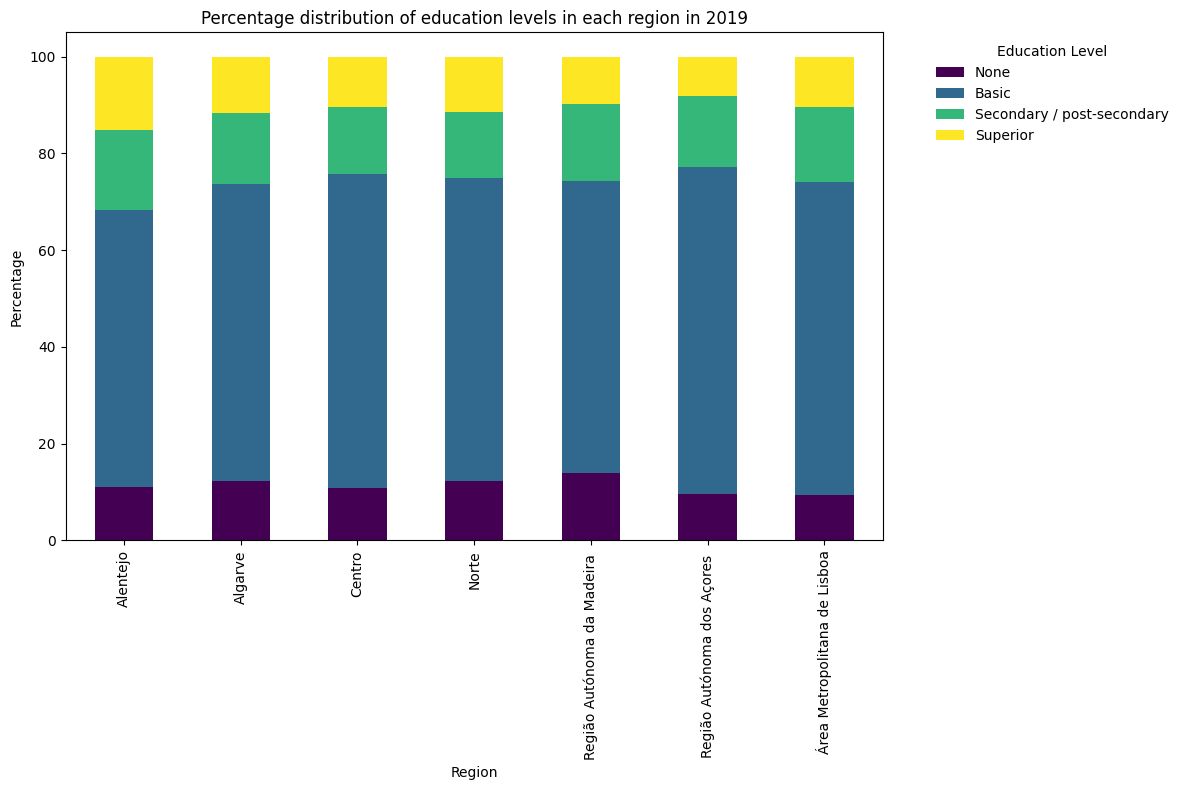

In [691]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivote de la tabla para facilitar la visualización
education_pivot = education_NUTS2_df_no_totals.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level')

# Ordenar las columnas para el gráfico
education_pivot = education_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
education_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Personalizar el gráfico
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Percentage distribution of education levels in each region in 2019')

# Ajustar la leyenda
legend = ax.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()

In [692]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar las regiones continentales y las regiones insulares
continent_regions = ['Norte', 'Algarve', 'Centro', 'Área Metropolitana de Lisboa', 'Alentejo']
island_regions = ['Região Autónoma dos Açores', 'Região Autónoma da Madeira']

# Filtrar los datos por regiones continentales e islas
continent_df = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['region_name'].str.strip().isin(continent_regions)]
island_df = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['region_name'].str.strip().isin(island_regions)]

island_df.head()


,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,ed_level_perc
26,20,Região Autónoma dos Açores,2,2019,2819,None,9.672992
27,20,Região Autónoma dos Açores,2,2019,19643,Basic,67.402121
28,20,Região Autónoma dos Açores,2,2019,4333,Secondary / post-secondary,14.868064
29,20,Região Autónoma dos Açores,2,2019,2348,Superior,8.056823
31,30,Região Autónoma da Madeira,2,2019,5184,None,14.036988


In [693]:
# Pivote de la tabla para continent_df
continent_pivot = continent_df.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivote de la tabla para island_df
island_pivot = island_df.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# See the results to analyze on text 
island_pivot.head()

el.education_level,Basic,None,Secondary / post-secondary,Superior
region_name,,,,
Região Autónoma da Madeira,60.309767,14.036988,15.748287,9.904958
Região Autónoma dos Açores,67.402121,9.672992,14.868064,8.056823


In [694]:
# See the results to analyze on text 

continent_pivot.head()

el.education_level,Basic,None,Secondary / post-secondary,Superior
region_name,,,,
Alentejo,57.221870,11.065790,16.442262,15.270078
Algarve,61.561660,12.197515,14.635564,11.605261
Centro,64.779799,10.904719,13.935709,10.379774
Norte,62.561792,12.243615,13.739824,11.454768
Área Metropolitana de Lisboa,64.650647,9.486137,15.504621,10.358595


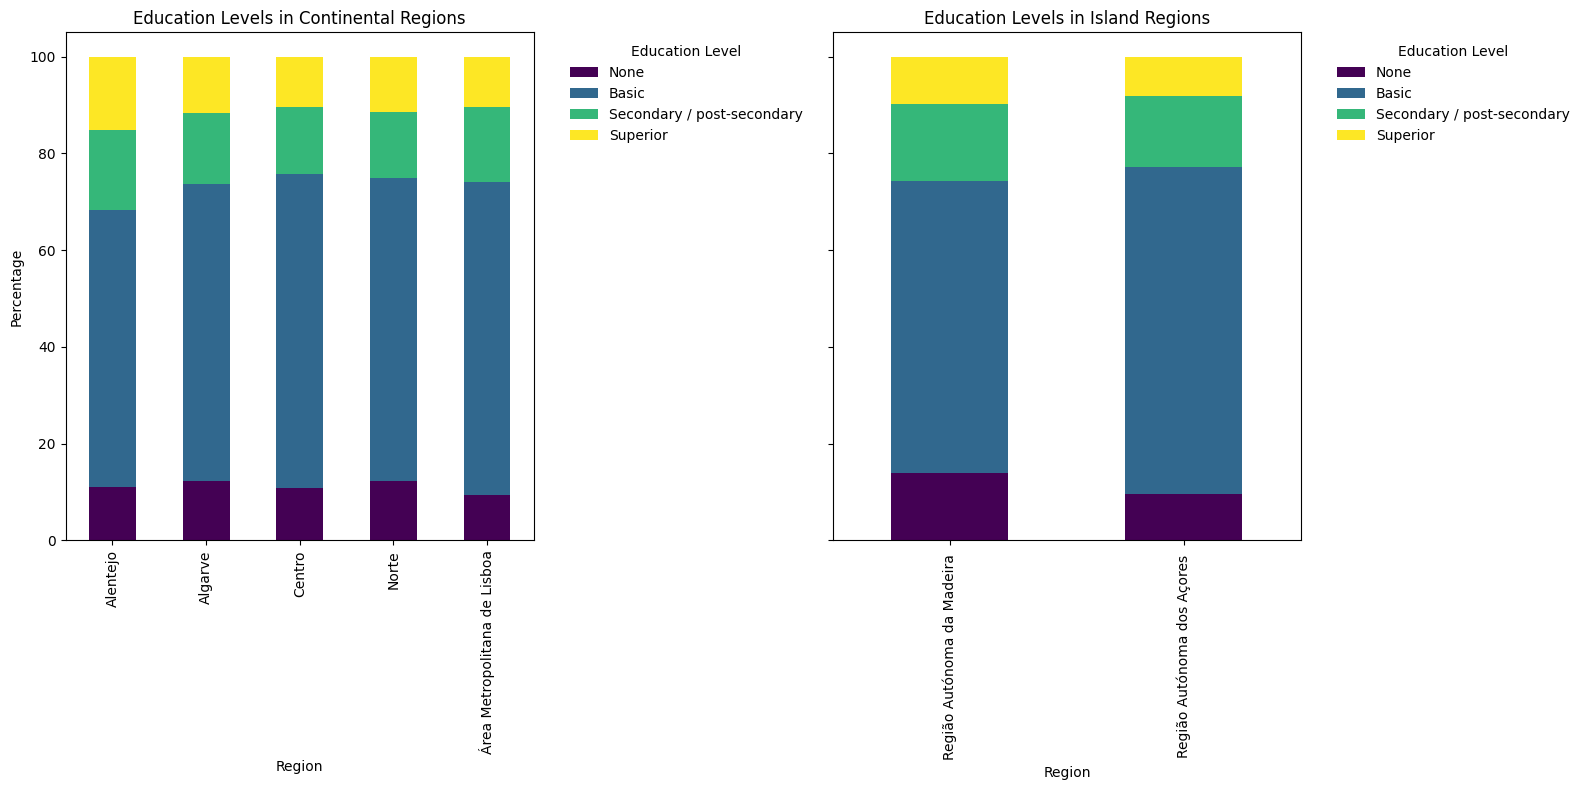

In [695]:
# Ordenar las columnas para el gráfico
continent_pivot = continent_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]
island_pivot = island_pivot[['None', 'Basic', 'Secondary / post-secondary', 'Superior']]

# Crear el gráfico de barras apiladas para regiones continentales
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

continent_pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('Education Levels in Continental Regions')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Percentage')

# Crear el gráfico de barras apiladas para regiones insulares
island_pivot.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Education Levels in Island Regions')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Percentage')

# Ajustar la leyenda
axes[0].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
axes[1].legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.show()


### Compare the relation between education and labour 

In [696]:
import pandas as pd

# Asegurarse de que los nombres de las regiones no tengan espacios adicionales
education_NUTS2_df_no_totals['region_name'] = education_NUTS2_df_no_totals['region_name'].str.strip()
labour_NUTS2_df['region_name'] = labour_NUTS2_df['region_name'].str.strip()

# Filtrar los datos de educación y trabajo para el mismo año (2019 en este caso)
education_2019 = education_NUTS2_df_no_totals[education_NUTS2_df_no_totals['e.year'] == 2019]
labour_2019 = labour_NUTS2_df[labour_NUTS2_df['l.year'] == 2019]

# Pivotear los datos de educación para obtener los porcentajes por nivel educativo
education_pivot = education_2019.pivot_table(values='ed_level_perc', index='region_name', columns='el.education_level', fill_value=0)

# Pivotear los datos de trabajo para obtener los valores por tipo de labor
labour_pivot = labour_2019.pivot_table(values='l.value', index='region_name', columns='ltn.type_labour', fill_value=0)

# Unir los datos de educación y trabajo
combined_df = pd.concat([education_pivot, labour_pivot], axis=1, join='inner')

# Ver el DataFrame combinado
print(combined_df.head())

                                Basic       None  Secondary / post-secondary  \
region_name                                                                    
Alentejo                    57.221870  11.065790                   16.442262   
Algarve                     61.561660  12.197515                   14.635564   
Centro                      64.779799  10.904719                   13.935709   
Norte                       62.561792  12.243615                   13.739824   
Região Autónoma da Madeira  60.309767  14.036988                   15.748287   

                             Superior  Family labour force   Holder  \
region_name                                                           
Alentejo                    15.270078              19874.0  13003.0   
Algarve                     11.605261               7134.0   4335.0   
Centro                      10.379774              72335.0  39900.0   
Norte                       11.454768              93339.0  50025.0   
Região Autóno

                                      Basic      None  \
Basic                              1.000000 -0.573378   
None                              -0.573378  1.000000   
Secondary / post-secondary        -0.556555 -0.008178   
Superior                          -0.851510  0.149315   
Family labour force                0.077148  0.143201   
Holder                             0.061817  0.130264   
Non-family labour force           -0.465304 -0.030949   
Non-regular                       -0.329876  0.084087   
Other family members               0.061987  0.196074   
Regular                           -0.468306 -0.105872   
Spouse                             0.110088  0.138317   
Total labour force in agriculture -0.073800  0.104129   
Workers not hired by the holder   -0.680340  0.042533   

                                   Secondary / post-secondary  Superior  \
Basic                                               -0.556555 -0.851510   
None                                               

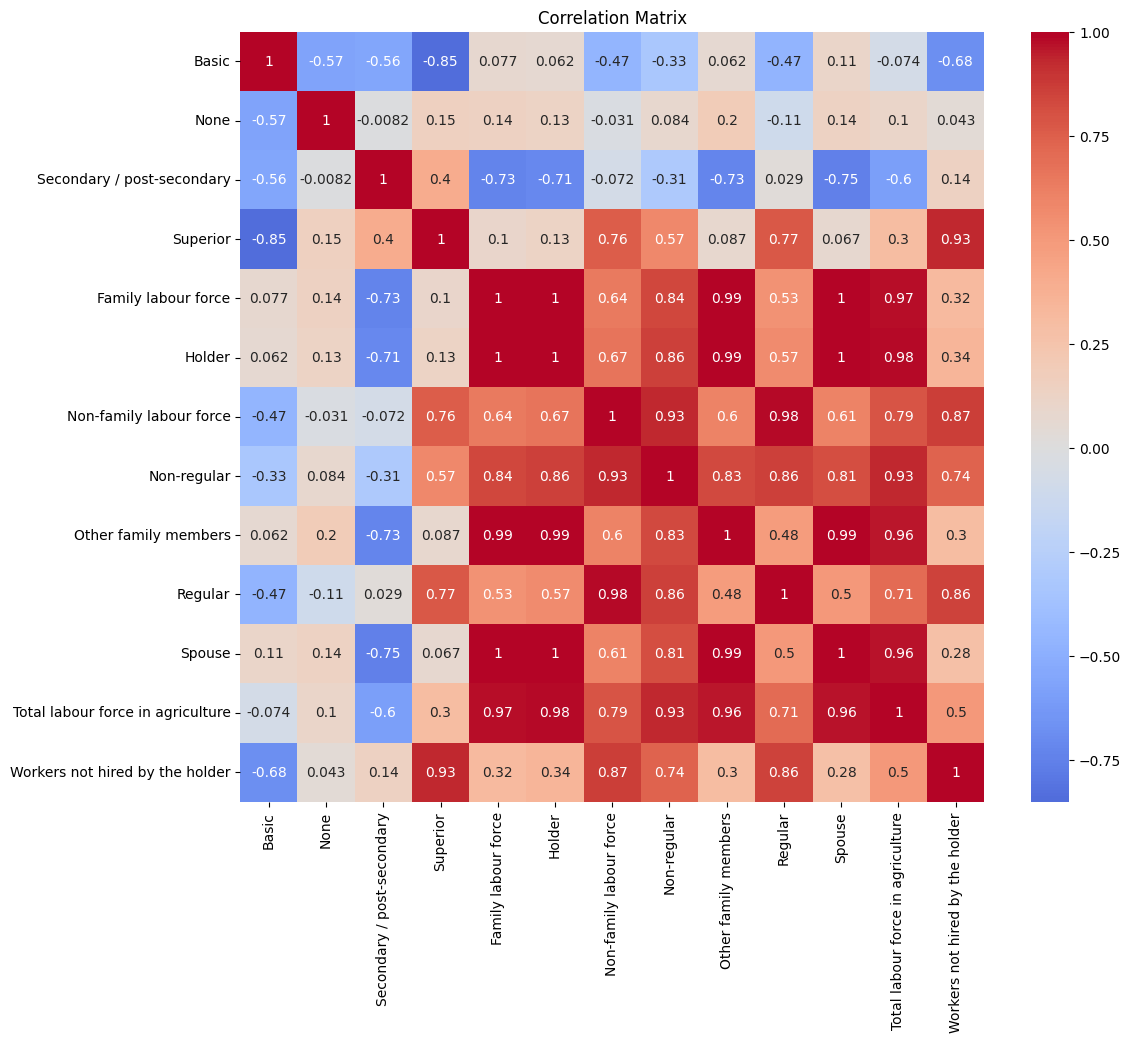

In [697]:
# Calcular la matriz de correlación
correlation_matrix = combined_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## NUTS4

### View data tendencies by region in Labour data

In [698]:
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
labour_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force
2,1111601,Arcos de Valdevez,4,2019,1046,Holder
3,1111601,Arcos de Valdevez,4,2019,626,Spouse
4,1111601,Arcos de Valdevez,4,2019,263,Other family members
...,...,...,...,...,...,...
2767,3003201,Porto Santo,4,2019,15,Other family members
2768,3003201,Porto Santo,4,2019,21,Non-family labour force
2769,3003201,Porto Santo,4,2019,17,Regular
2770,3003201,Porto Santo,4,2019,4,Non-regular


In [699]:
# Create a list of the region_name

labour_NUTS4_df_list = labour_NUTS4_df['region_name'].unique().tolist()
print(labour_NUTS4_df_list)

print(len(labour_NUTS4_df_list))


['Arcos de Valdevez', 'Caminha', 'Melgaço', 'Monção', 'Paredes de Coura', 'Ponte da Barca', 'Ponte de Lima', 'Valença', 'Viana do Castelo', 'Vila Nova de Cerveira', 'Amares', 'Barcelos', 'Braga', 'Esposende', 'Terras de Bouro', 'Vila Verde', 'Cabeceiras de Basto', 'Fafe', 'Guimarães', 'Póvoa de Lanhoso', 'Vieira do Minho', 'Vila Nova de Famalicão', 'Vizela', 'Mondim de Basto', 'Arouca', 'Espinho', 'Santa Maria da Feira', 'Oliveira de Azeméis', 'São João da Madeira', 'Vale de Cambra', 'Gondomar', 'Maia', 'Matosinhos', 'Paredes', 'Porto', 'Póvoa de Varzim', 'Santo Tirso', 'Valongo', 'Vila do Conde', 'Vila Nova de Gaia', 'Trofa', 'Boticas', 'Chaves', 'Montalegre', 'Ribeira de Pena', 'Valpaços', 'Vila Pouca de Aguiar', 'Castelo de Paiva', 'Celorico de Basto', 'Amarante', 'Baião', 'Felgueiras', 'Lousada', 'Marco de Canaveses', 'Paços de Ferreira', 'Penafiel', 'Cinfães', 'Resende', 'Carrazeda de Ansiães', 'Freixo de Espada à Cinta', 'Torre de Moncorvo', 'Vila Nova de Foz Côa', 'Alijó', 'Mesã

In [749]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS4_df.head(10)


,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,percentage,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,33.338658,Norte
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,30.910543,Norte
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,16.709265,Norte
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,10.000000,Norte
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,4.201278,Norte
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,2.428115,Norte
6,1111601,Arcos de Valdevez,4,2019,75,Regular,1.198083,Norte
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,1.038339,Norte
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,0.175719,Norte
9,1111602,Caminha,4,2019,407,Total labour force in agriculture,33.306056,Norte


In [751]:
# Calculate the total labor force per region
total_labour_per_region_nuts4 = labour_NUTS4_df.groupby('region_name')['l.value'].transform('sum')

# Calculate the percentage of each labor type within each region
labour_NUTS4_df['percentage'] = (labour_NUTS4_df['l.value'] / total_labour_per_region_nuts4) * 100

total_labour_per_region_nuts4.head(3000)

0       6260
1       6260
2       6260
3       6260
4       6260
        ... 
2767     386
2768     386
2769     386
2770     386
2771     386
Name: l.value, Length: 2772, dtype: int64

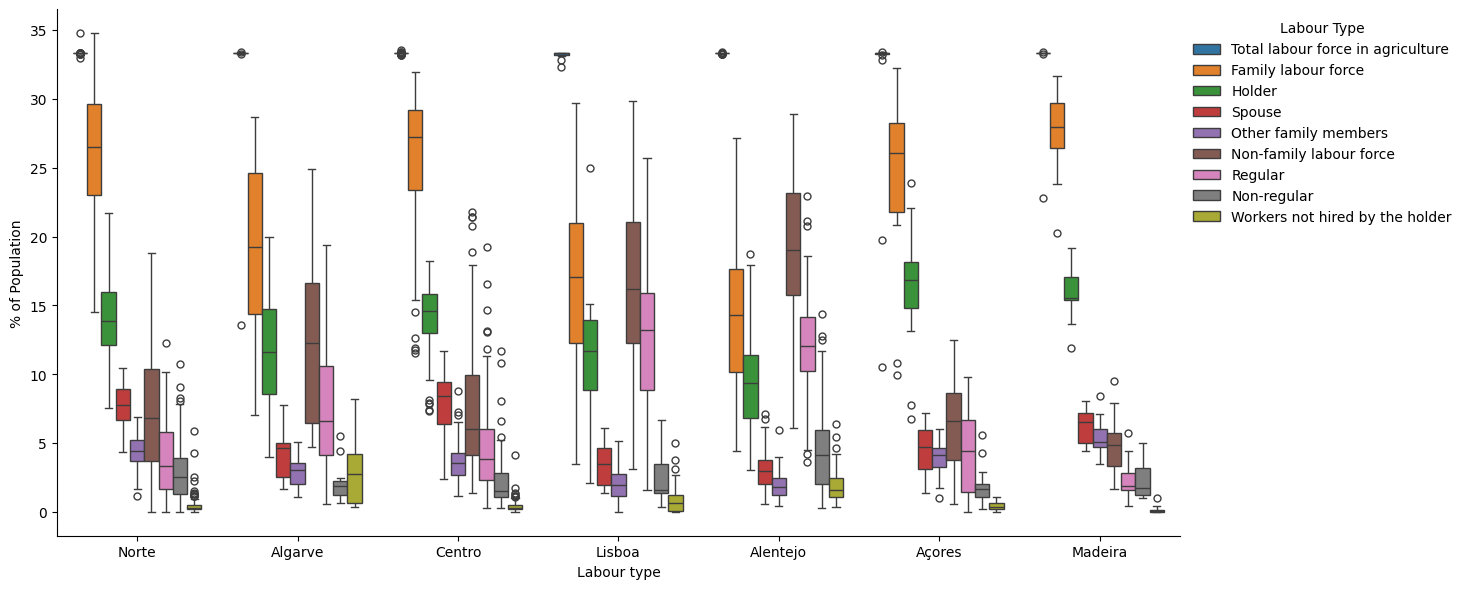

In [752]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=labour_NUTS4_df, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="percentage", # Variable on y-axis: percentage
    hue="ltn.type_labour", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Labour Type', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()


### View data tendencies by region in education data

In [703]:
education_NUTS4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
education_NUTS4_df.fillna('None', inplace=True)
education_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level
0,1111601,Arcos de Valdevez,4,2019,4512,Total
1,1111602,Caminha,4,2019,968,Total
2,1111603,Melgaço,4,2019,2360,Total
3,1111604,Monção,4,2019,4341,Total
4,1111605,Paredes de Coura,4,2019,1995,Total
...,...,...,...,...,...,...
1535,3003107,Ribeira Brava,4,2019,265,Superior
1536,3003108,Santa Cruz,4,2019,379,Superior
1537,3003109,Santana,4,2019,374,Superior
1538,3003110,São Vicente,4,2019,266,Superior


In [730]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
education_NUTS4_df['region_name_nuts2'] = education_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
education_NUTS4_df.head(309)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte
...,...,...,...,...,...,...,...
304,3003108,Santa Cruz,4,2019,3808,Total,Madeira
305,3003109,Santana,4,2019,3883,Total,Madeira
306,3003110,São Vicente,4,2019,2753,Total,Madeira
307,3003201,Porto Santo,4,2019,320,Total,Madeira


In [705]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS4_df[(education_NUTS4_df['NutsID'] == id) & (education_NUTS4_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS4_df_no_totals = education_NUTS4_df[education_NUTS4_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS4_df_no_totals['ed_level_perc'] = education_NUTS4_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS4_df_no_totals.head(1000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.991135
309,1111602,Caminha,4,2019,141,None,Norte,14.566116
310,1111603,Melgaço,4,2019,346,None,Norte,14.661017
311,1111604,Monção,4,2019,616,None,Norte,14.190279
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.190476
...,...,...,...,...,...,...,...,...
1303,11D1807,Moimenta da Beira,4,2019,181,Superior,Norte,8.846530
1304,11D1812,Penedono,4,2019,171,Superior,Norte,11.593220
1305,11D1815,São João da Pesqueira,4,2019,494,Superior,Norte,12.122699
1306,11D1818,Sernancelhe,4,2019,186,Superior,Norte,9.877854


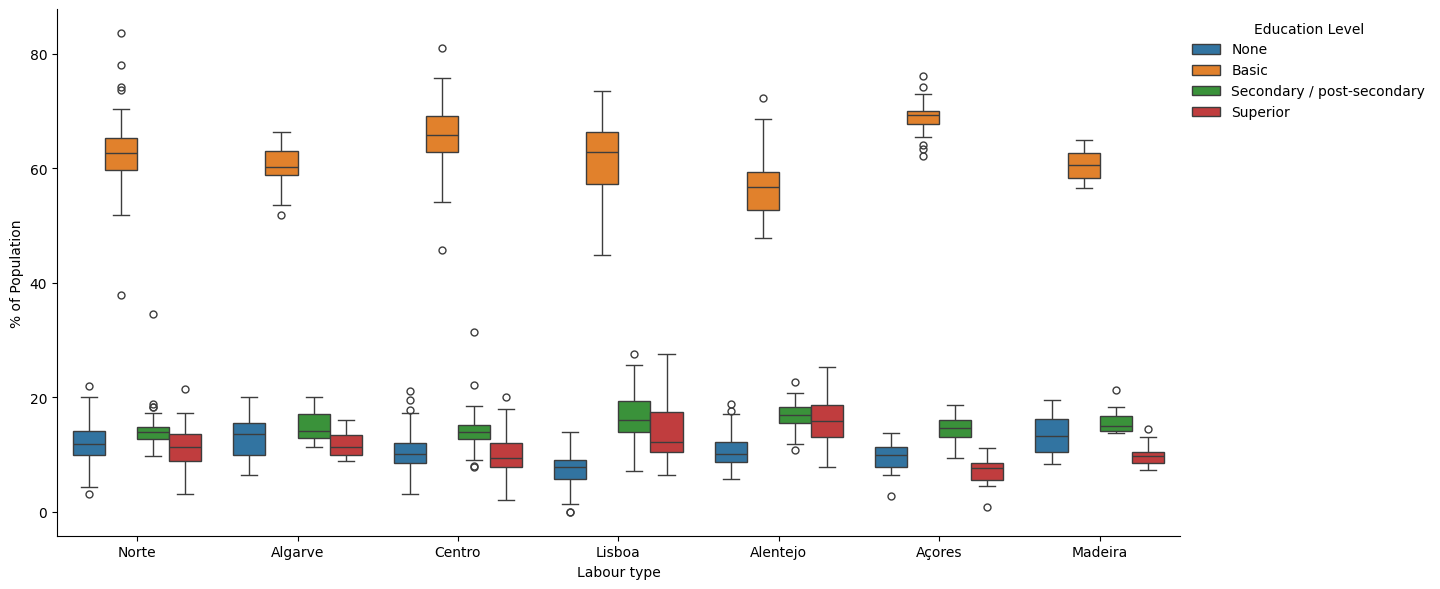

In [706]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot catplot plot
plot = sns.catplot(
    data=education_NUTS4_df_no_totals, # Use DataFrame labour_NUTS4_df
    x="region_name_nuts2", # Variable on x-axis: region_name_nuts2
    y="ed_level_perc", # Variable on y-axis: percentage
    hue="el.education_level", # Variable to separate by color: ltn.type_labour
    kind="box", # Chart type: boxplot
    height=6, # Height of the figure
    aspect=2, # Aspect ratio
    legend_out=False # Disable legend outside the plot
)

# Add labels to axes
plt.xlabel('Labour type') # Label the x-axis
plt.ylabel('% of Population') # y-axis label

# Adjust the position of the legend outside the chart
plt.legend(title='Education Level', bbox_to_anchor=(1.0, 1), loc='upper left', frameon=False)

# Show the chart
plt.show()

### Compare the relation between education and labour 

In [753]:
education_NUTS4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
education_NUTS4_df.fillna('None', inplace=True)

In [754]:
# Calculate the percentage of each level education type within each region
total_education_per_region_nuts4 = education_NUTS4_df.groupby('region_name')['e.value'].transform('sum')
education_NUTS4_df['percentage'] = (education_NUTS4_df['e.value'] / total_education_per_region_nuts4) * 100
education_NUTS4_df_filtered = education_NUTS4_df[education_NUTS4_df['el.education_level'] == 'Basic']
education_NUTS4_df_filtered.head(320)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,percentage
616,1111601,Arcos de Valdevez,4,2019,2773,Basic,30.729167
617,1111602,Caminha,4,2019,628,Basic,32.438017
618,1111603,Melgaço,4,2019,1396,Basic,29.576271
619,1111604,Monção,4,2019,2612,Basic,30.085234
620,1111605,Paredes de Coura,4,2019,1304,Basic,32.681704
...,...,...,...,...,...,...,...
919,3003107,Ribeira Brava,4,2019,2152,Basic,29.864002
920,3003108,Santa Cruz,4,2019,2243,Basic,29.451155
921,3003109,Santana,4,2019,2249,Basic,28.959567
922,3003110,São Vicente,4,2019,1558,Basic,28.296404


In [755]:
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
labour_NUTS4_df.head(3000)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force
2,1111601,Arcos de Valdevez,4,2019,1046,Holder
3,1111601,Arcos de Valdevez,4,2019,626,Spouse
4,1111601,Arcos de Valdevez,4,2019,263,Other family members
...,...,...,...,...,...,...
2767,3003201,Porto Santo,4,2019,15,Other family members
2768,3003201,Porto Santo,4,2019,21,Non-family labour force
2769,3003201,Porto Santo,4,2019,17,Regular
2770,3003201,Porto Santo,4,2019,4,Non-regular


In [756]:
# Calculate the percentage of each labor type within each region
total_labour_per_region_nuts4 = labour_NUTS4_df.groupby('region_name')['l.value'].transform('sum')
labour_NUTS4_df['percentage'] = (labour_NUTS4_df['l.value'] / total_labour_per_region_nuts4) * 100
labour_NUTS4_df_filtered = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == 'Total labour force in agriculture']

labour_NUTS4_df_filtered.head(320)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,percentage
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,33.338658
9,1111602,Caminha,4,2019,407,Total labour force in agriculture,33.306056
18,1111603,Melgaço,4,2019,980,Total labour force in agriculture,33.356025
27,1111604,Monção,4,2019,1984,Total labour force in agriculture,33.327734
36,1111605,Paredes de Coura,4,2019,753,Total labour force in agriculture,33.318584
...,...,...,...,...,...,...,...
2727,3003107,Ribeira Brava,4,2019,901,Total labour force in agriculture,33.345670
2736,3003108,Santa Cruz,4,2019,1148,Total labour force in agriculture,33.333333
2745,3003109,Santana,4,2019,1097,Total labour force in agriculture,33.343465
2754,3003110,São Vicente,4,2019,1402,Total labour force in agriculture,33.341260


In [757]:
# Estos son todos los niveles de educación: ['None', 'Basic', 'Secondary / post-secondary' ,'Superior']

education_NUTS4_df_filtered = education_NUTS4_df[education_NUTS4_df['el.education_level'] == 'Basic'] 

# Estas tambien son variables: de labour_NUTS4_df_filtered 'Total labour force in agriculture', 'Family labour force', 'Holder', 'Spouse' ,'Other family members' ,'Non-family labour force' ,'Regular', 'Non-regular', 'Workers not hired by the holder']

labour_NUTS4_df_filtered = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == 'Total labour force in agriculture']




               Education Level                         Labor Type  Correlation
0                         None  Total labour force in agriculture     0.202745
1                         None                Family labour force     0.254444
2                         None                             Holder     0.212792
3                         None                             Spouse     0.269775
4                         None               Other family members     0.147014
5                         None            Non-family labour force    -0.181291
6                         None                            Regular    -0.242330
7                         None                        Non-regular    -0.004282
8                         None    Workers not hired by the holder    -0.006616
9                        Basic  Total labour force in agriculture     0.568198
10                       Basic                Family labour force     0.478100
11                       Basic                      

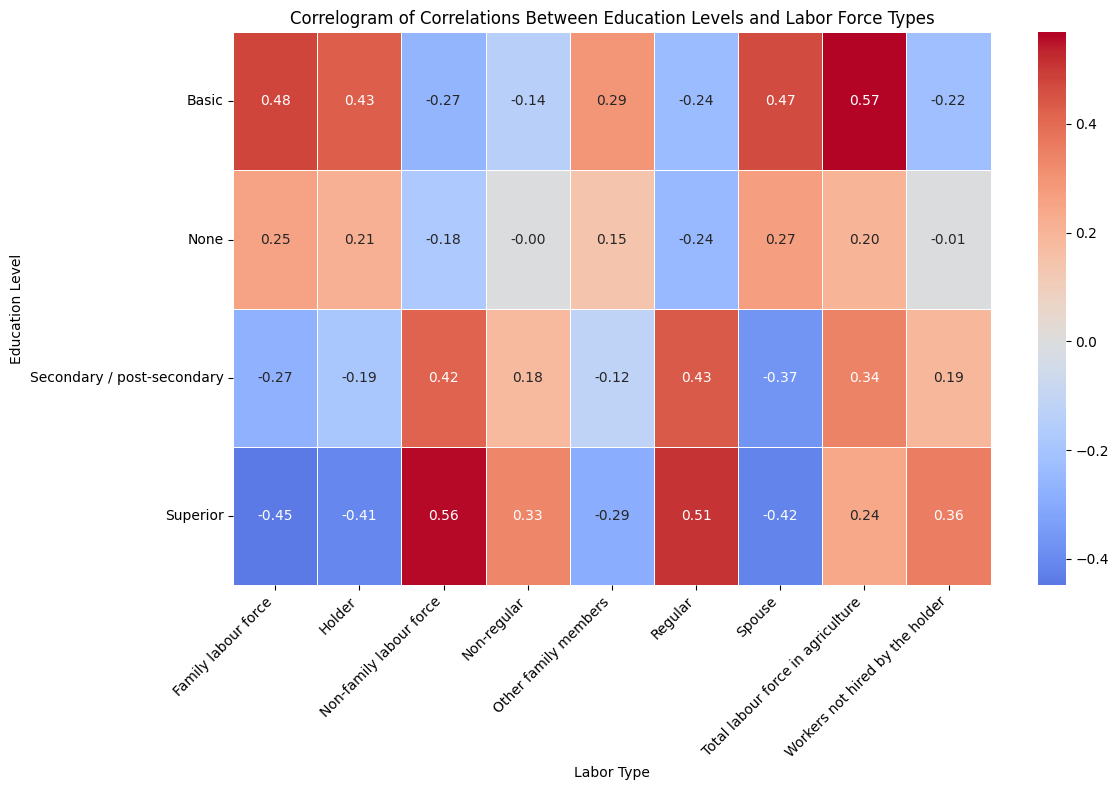

In [769]:
import pandas as pd


# Definir los niveles de educación y tipos de fuerza laboral de interés
niveles_educacion = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']
tipos_labor = ['Total labour force in agriculture', 'Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# Lista para almacenar los resultados de correlación
correlation_results = []

# Iterar sobre cada nivel de educación y tipo de fuerza laboral
for nivel_educacion in niveles_educacion:
    for tipo_labor in tipos_labor:
        # Filtrar los dataframes por nivel de educación y tipo de fuerza laboral
        df_educacion_filtrado = education_NUTS4_df[education_NUTS4_df['el.education_level'] == nivel_educacion]
        df_labor_filtrado = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_educacion_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # print(df_combinado.head()) 
        
        
        # Calcular la correlación entre las columnas relevantes
        correlacion = df_combinado['percentage_x'].corr(df_combinado['percentage_y'])
        
        # Almacenar los resultados de correlación junto con los nombres de nivel de educación y tipo de labor
        correlation_results.append({
            'Education Level': nivel_educacion,
            'Labor Type': tipo_labor,
            'Correlation': correlacion
        })

# Crear un dataframe a partir de la lista de resultados de correlación
df_correlation= pd.DataFrame(correlation_results)

# Mostrar los resultados de correlación
print(df_correlation)

# Generate a correlogram
plt.figure(figsize=(12, 8))
correlation_matrix = df_correlation.pivot(index="Education Level", columns="Labor Type", values="Correlation")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".2f")
plt.title('Correlogram of Correlations Between Education Levels and Labor Force Types')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\cespe\AppData\Local\Temp\ipykernel_18996\3988812885.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


               Education Level                      Type of Labor        R²
0                         None  Total labour force in agriculture  0.041105
1                         None                Family labour force  0.064742
2                         None                             Holder  0.045280
3                         None                             Spouse  0.072779
4                         None               Other family members  0.021613
5                         None            Non-family labour force  0.032866
6                         None                            Regular  0.058724
7                         None                        Non-regular  0.000018
8                         None    Workers not hired by the holder  0.000044
9                        Basic  Total labour force in agriculture  0.322848
10                       Basic                Family labour force  0.228580
11                       Basic                             Holder  0.183085
12          

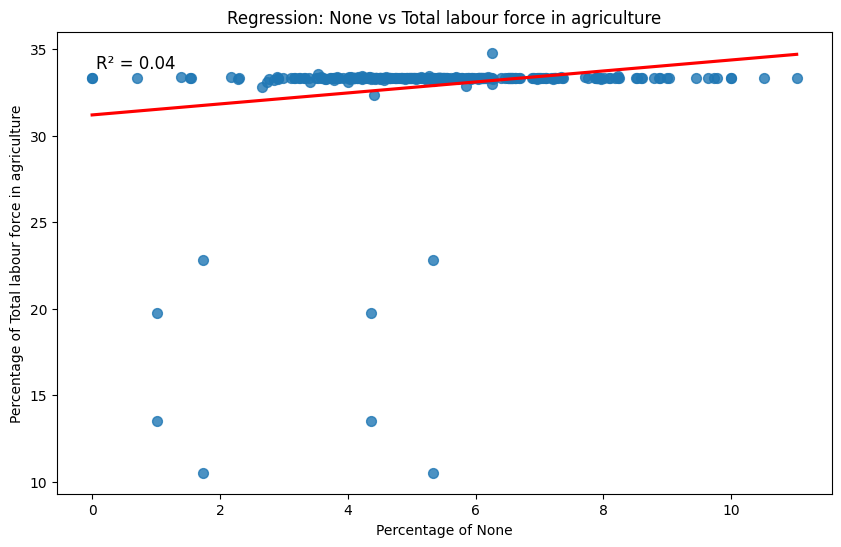

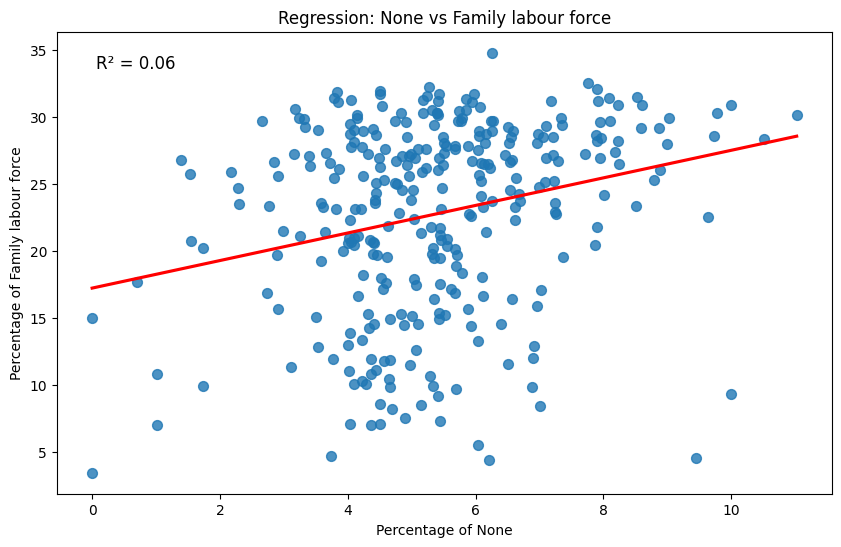

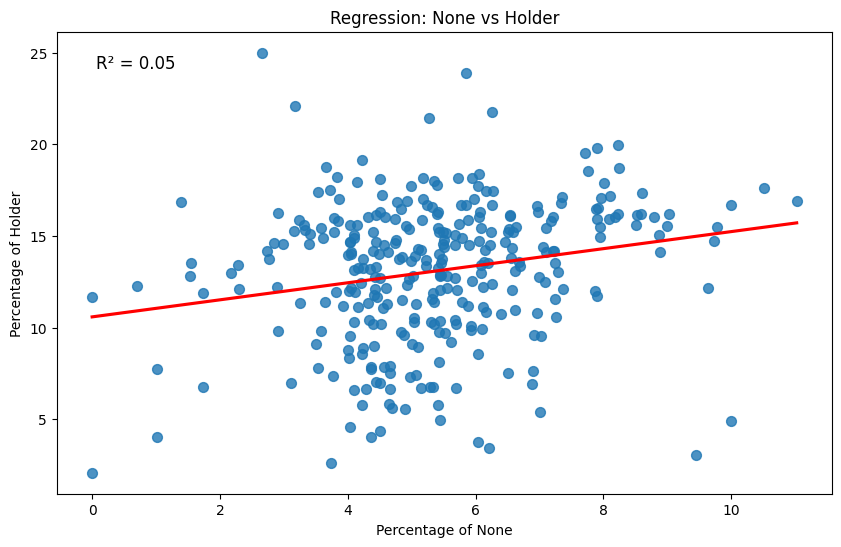

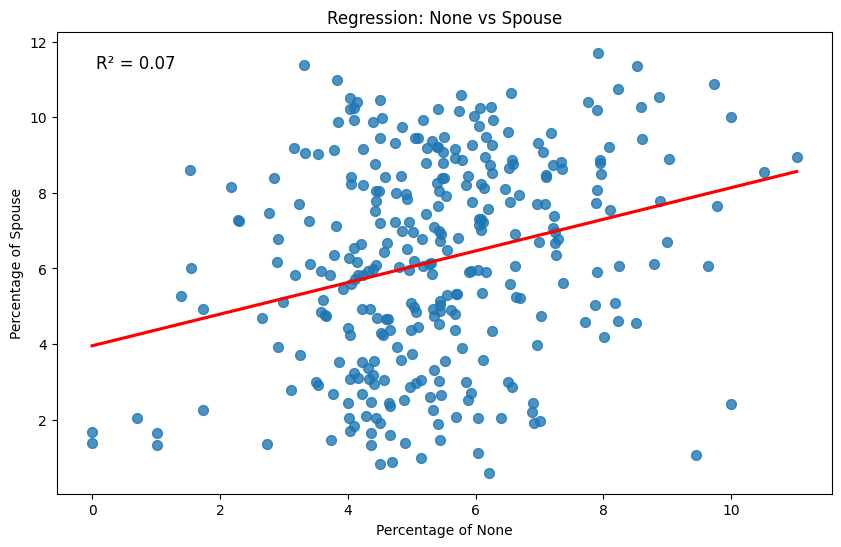

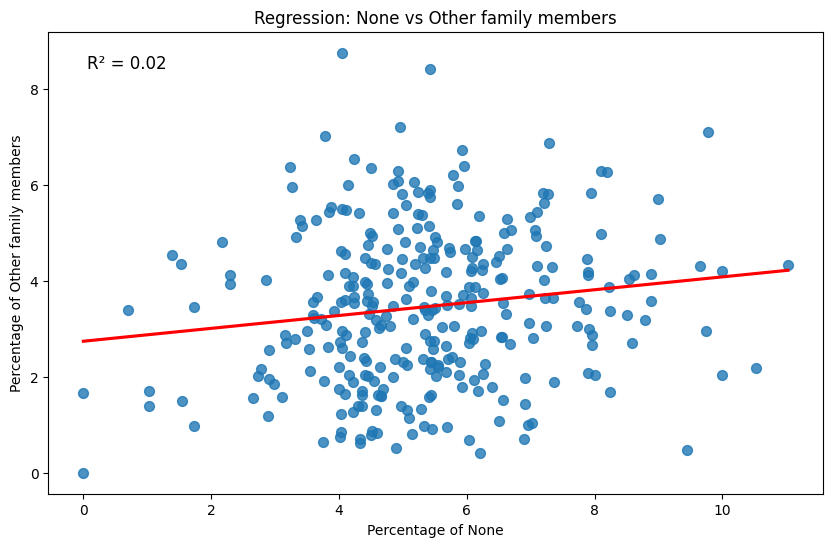

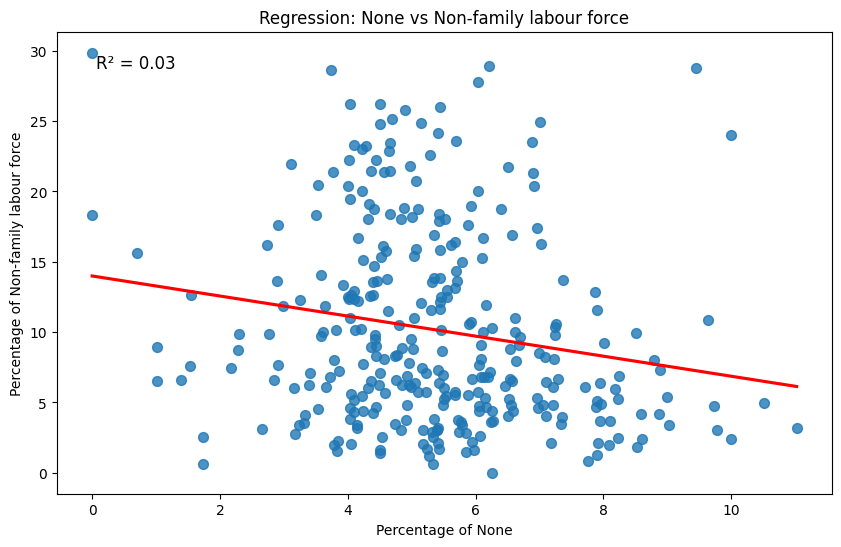

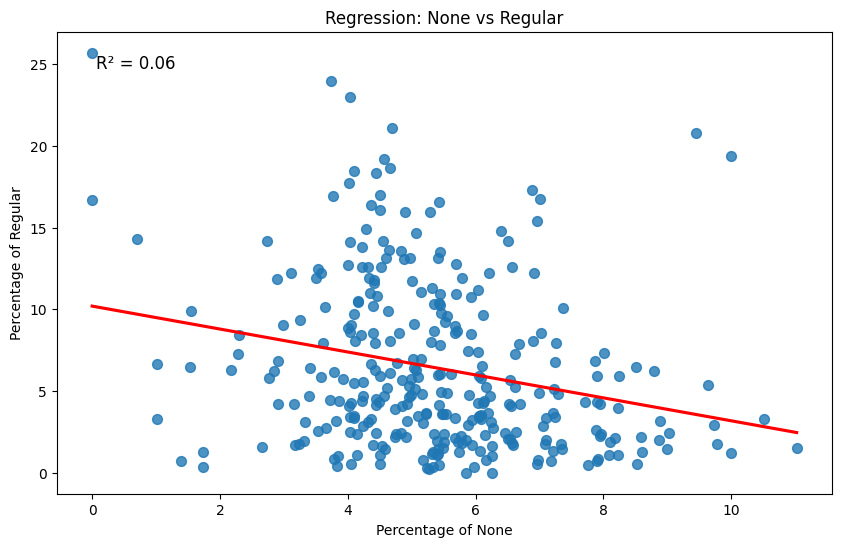

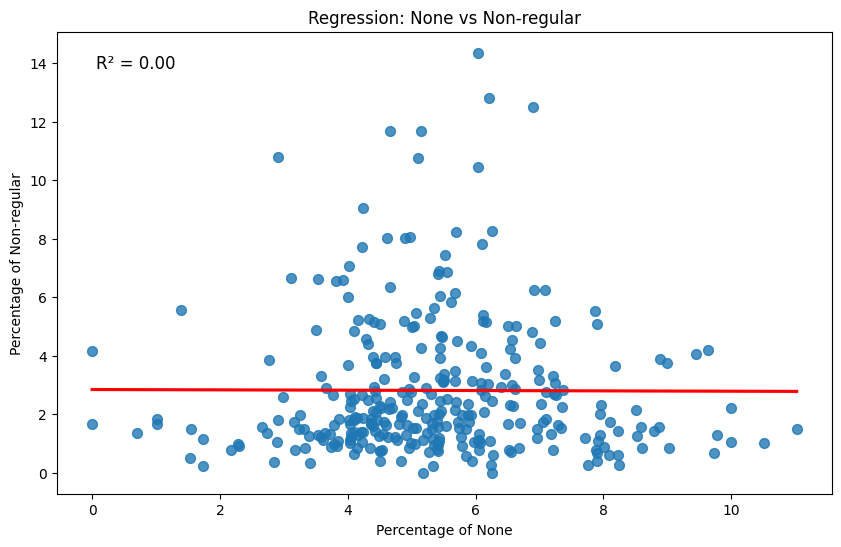

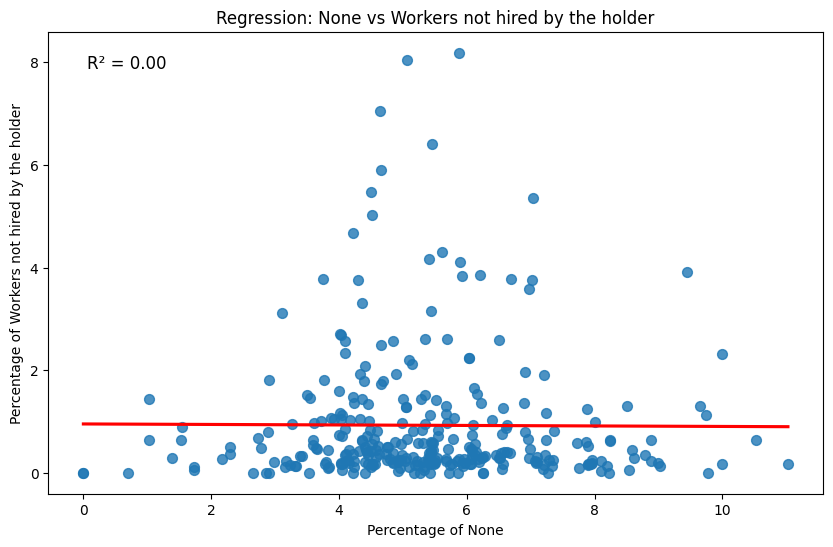

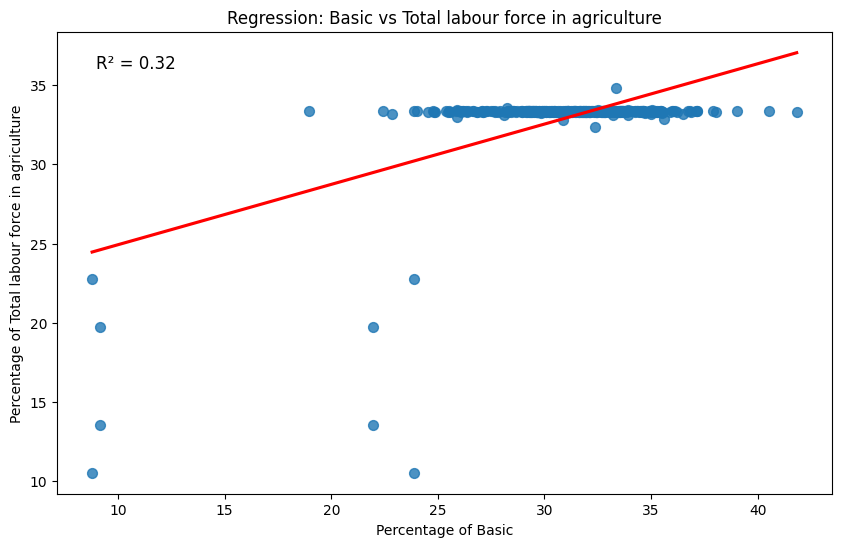

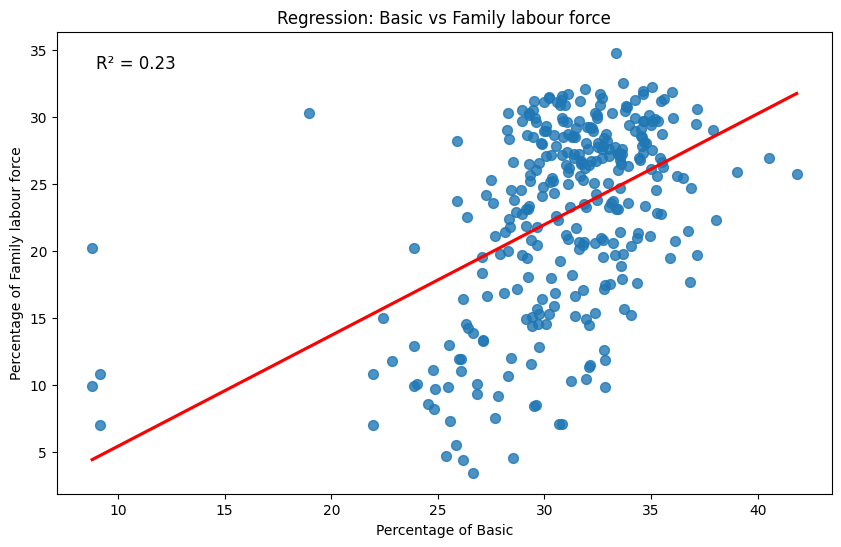

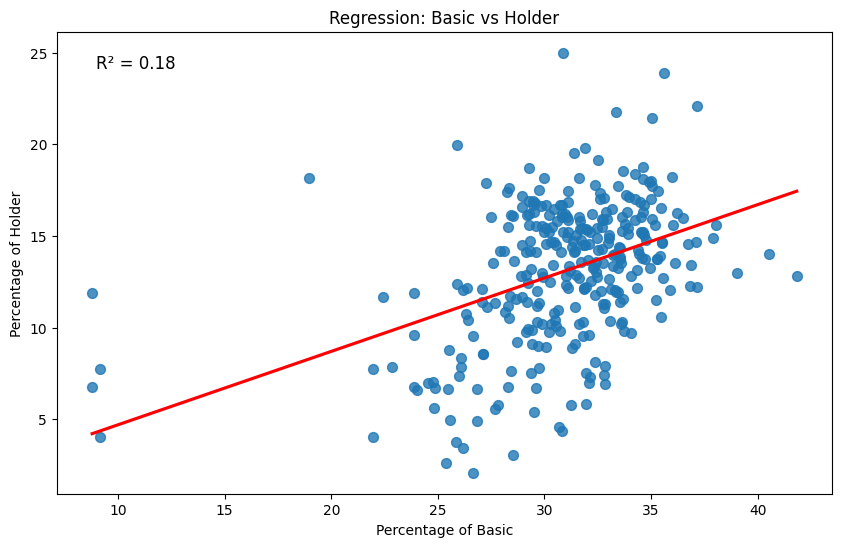

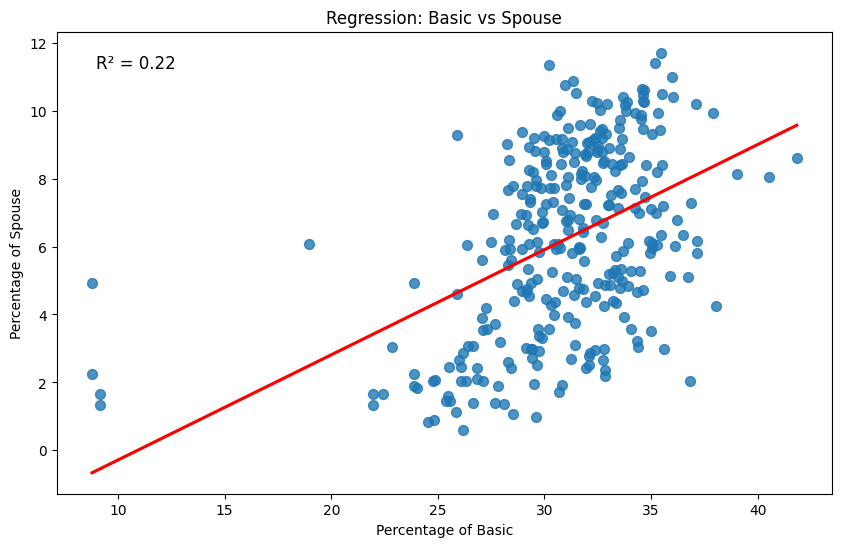

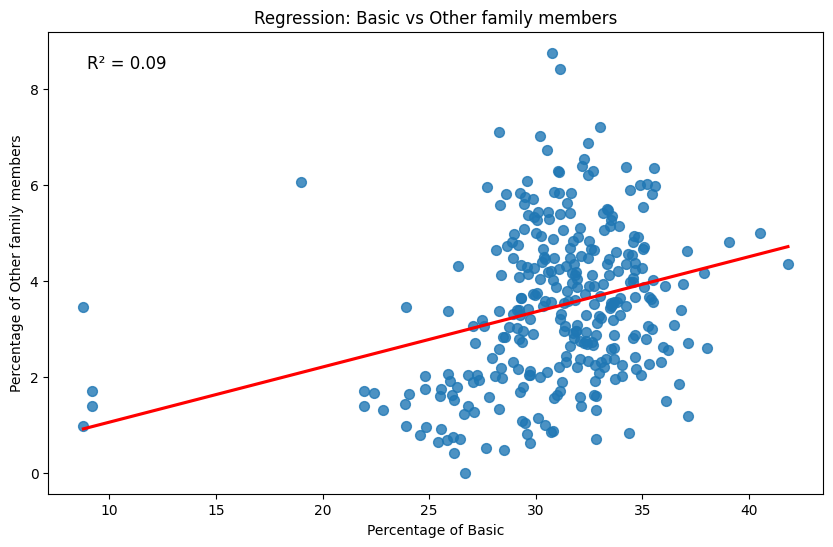

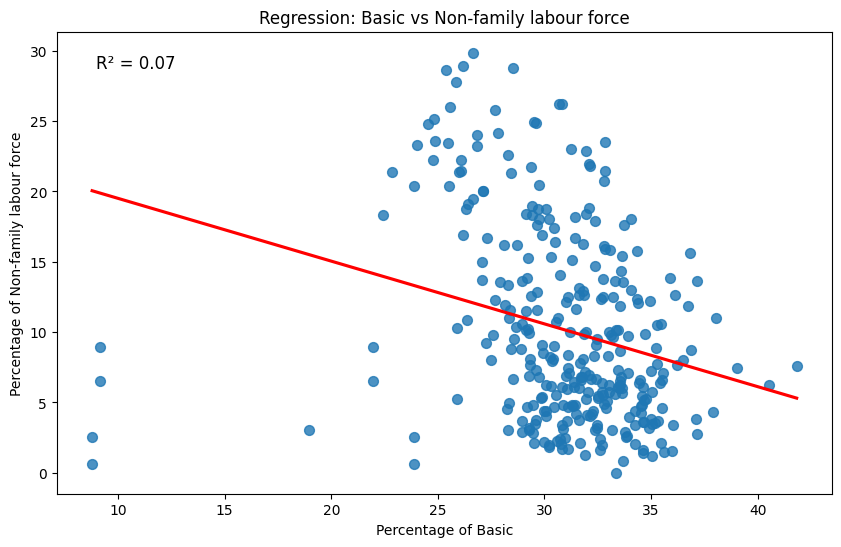

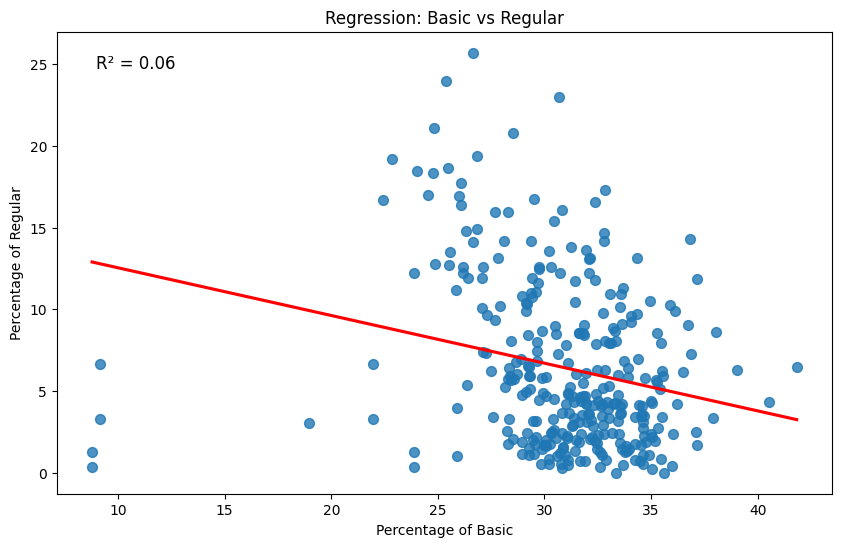

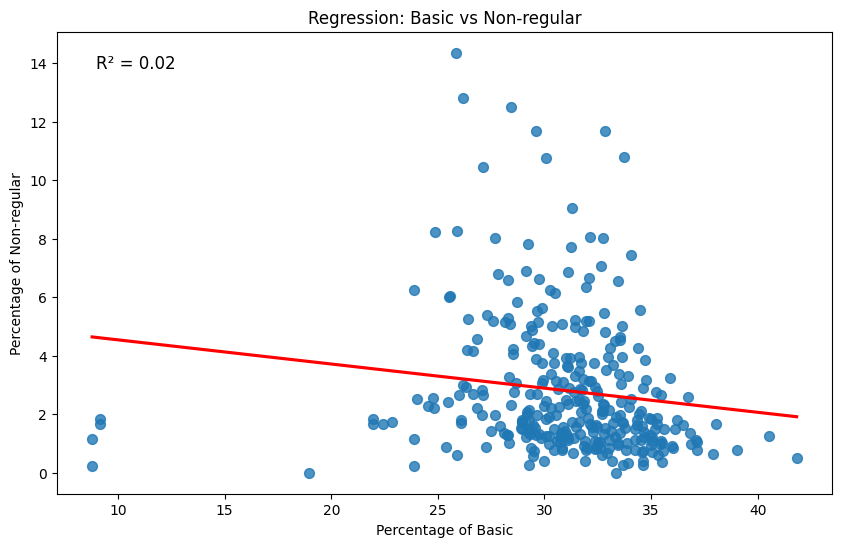

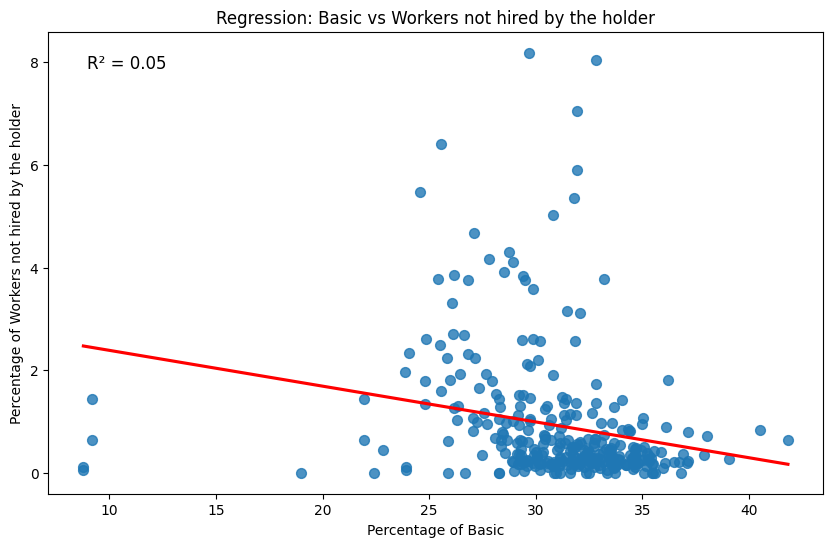

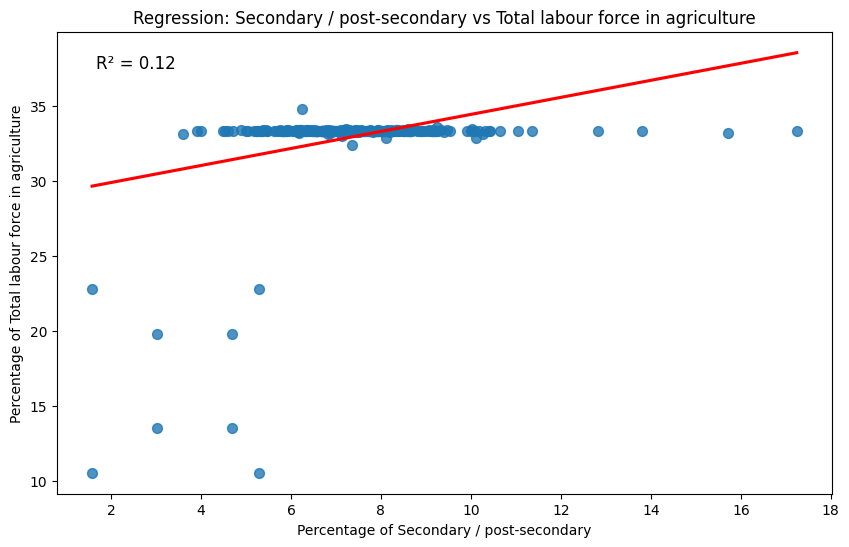

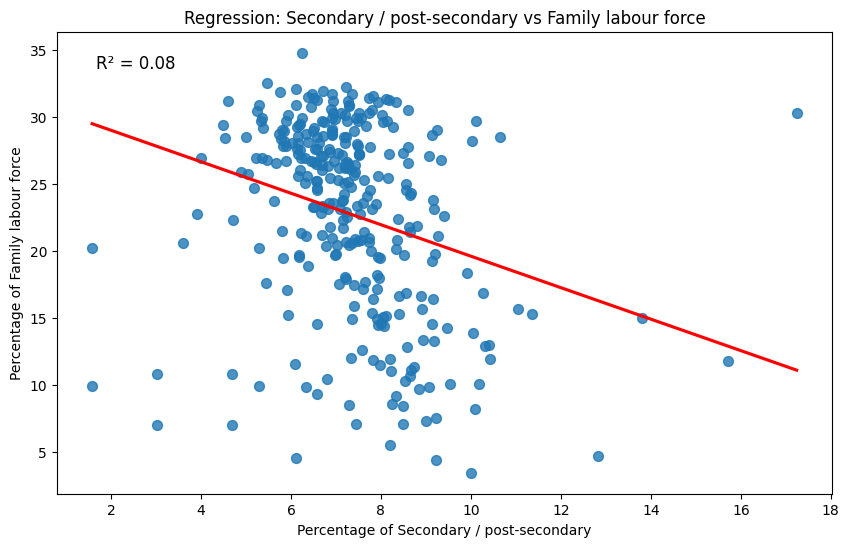

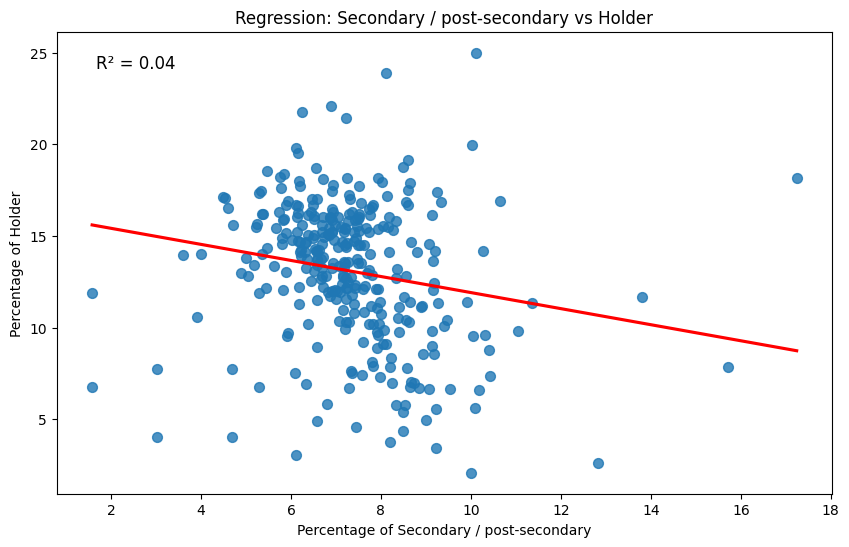

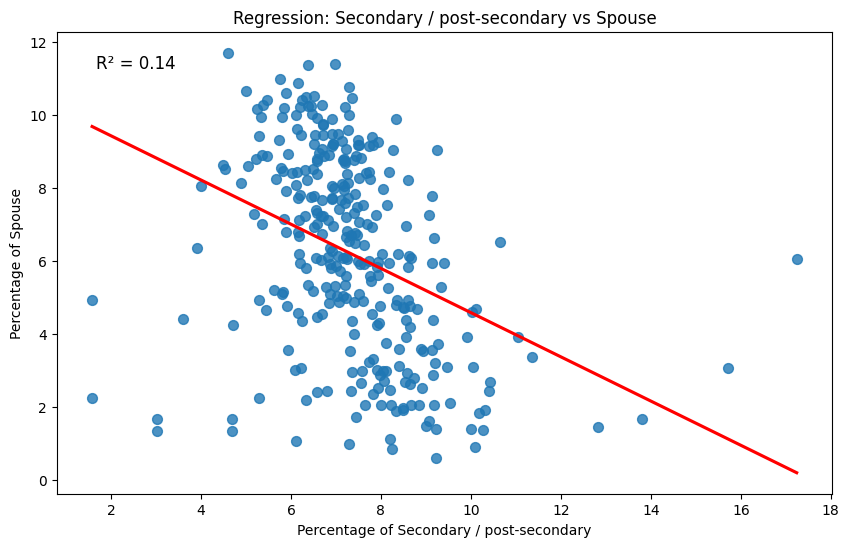

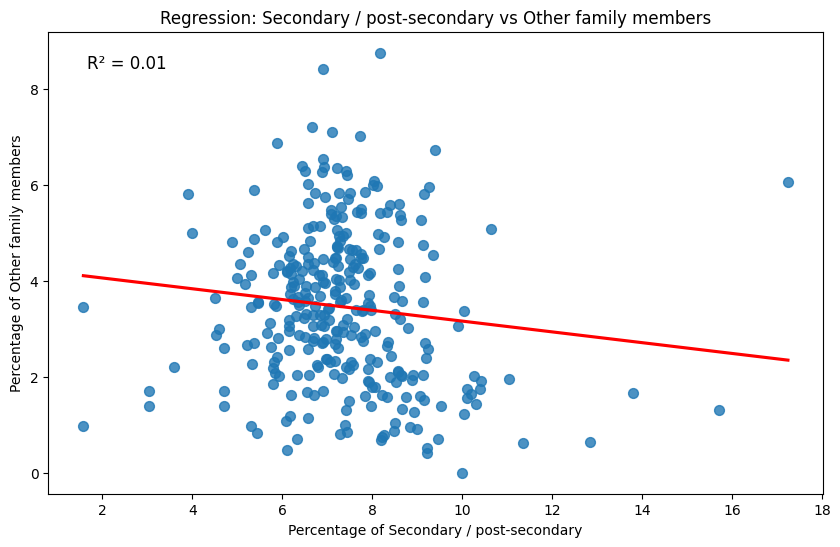

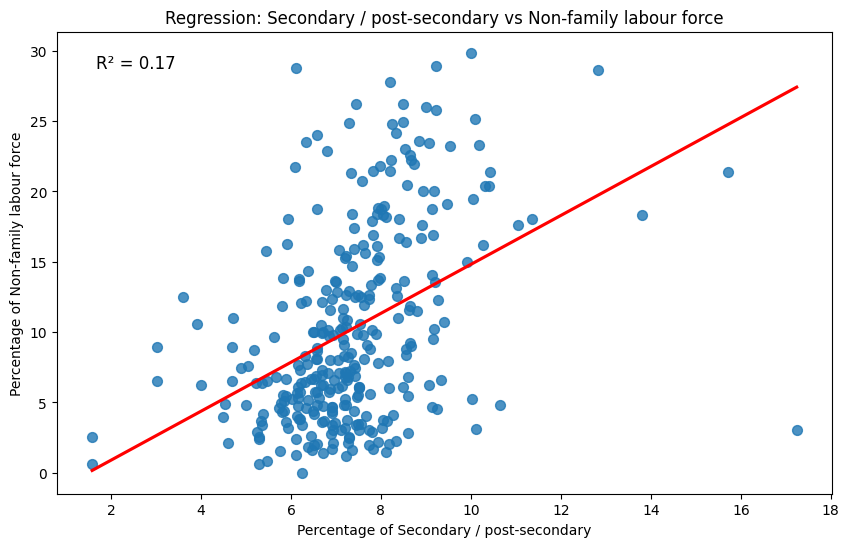

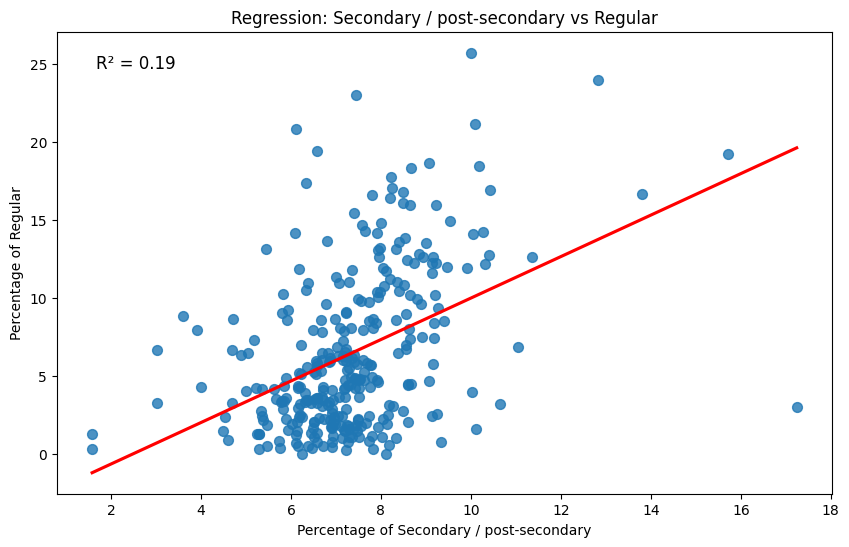

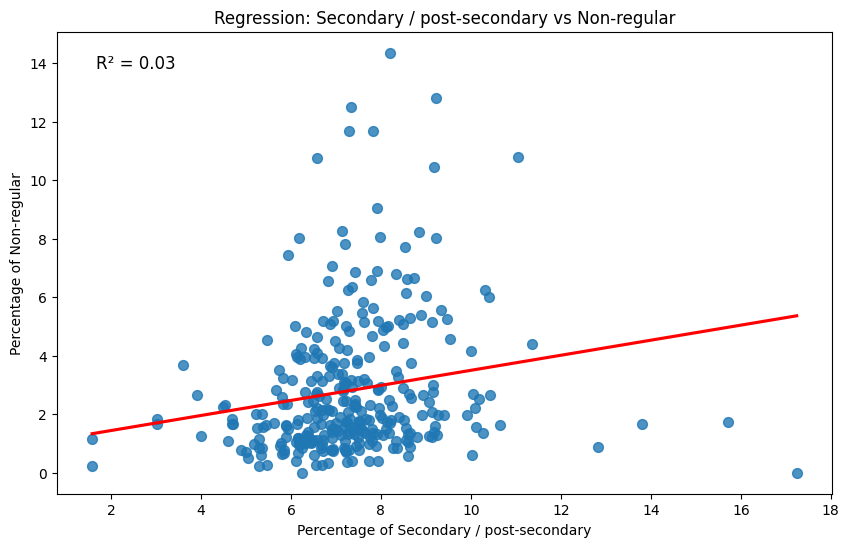

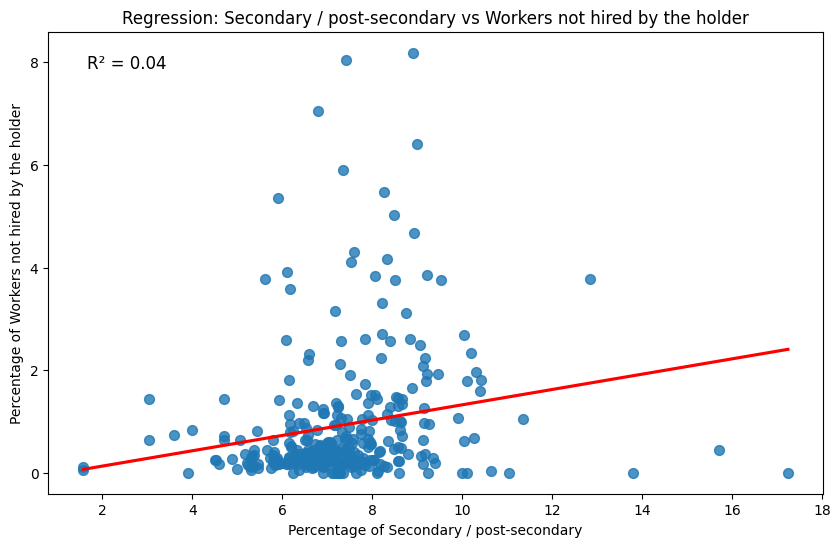

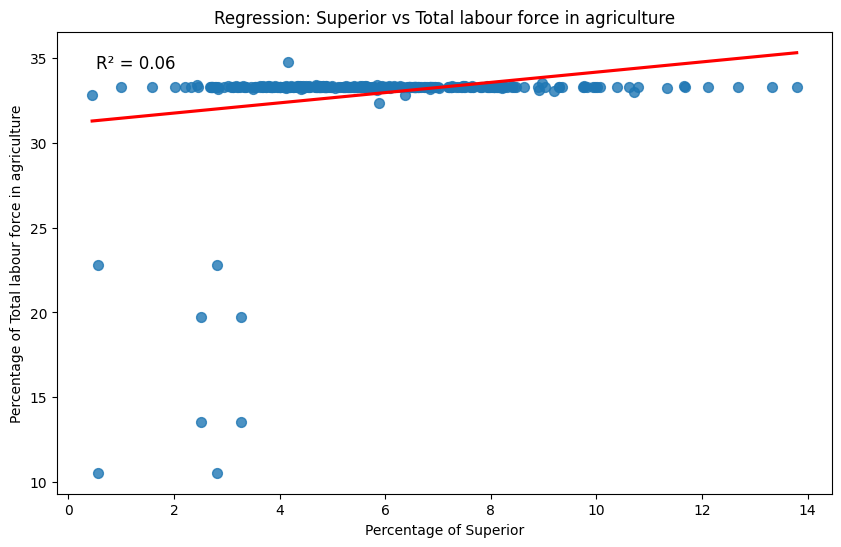

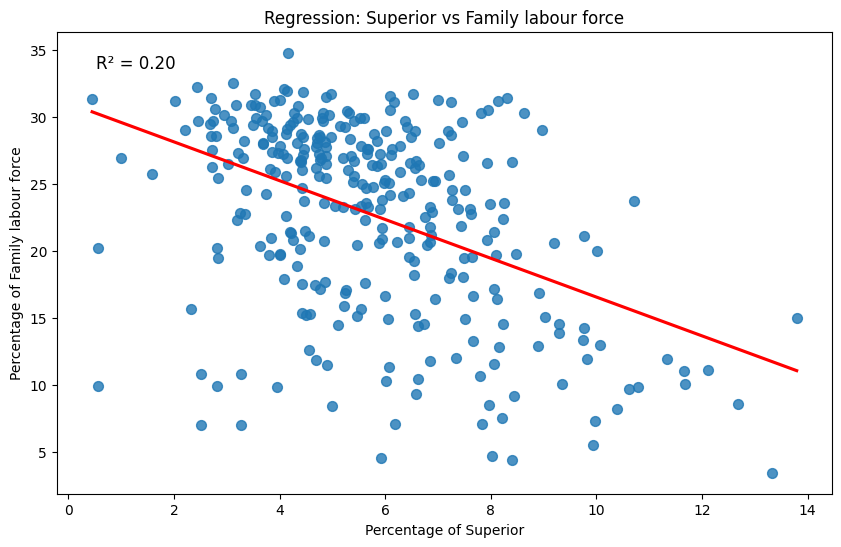

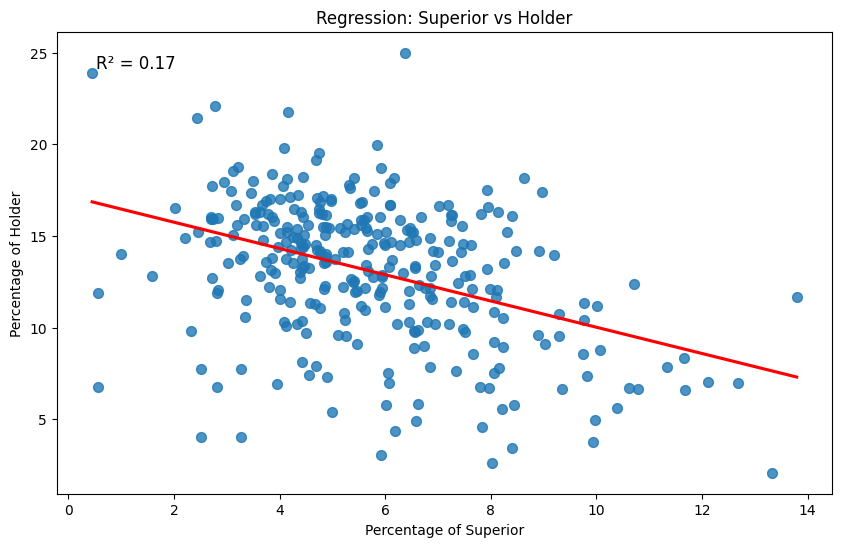

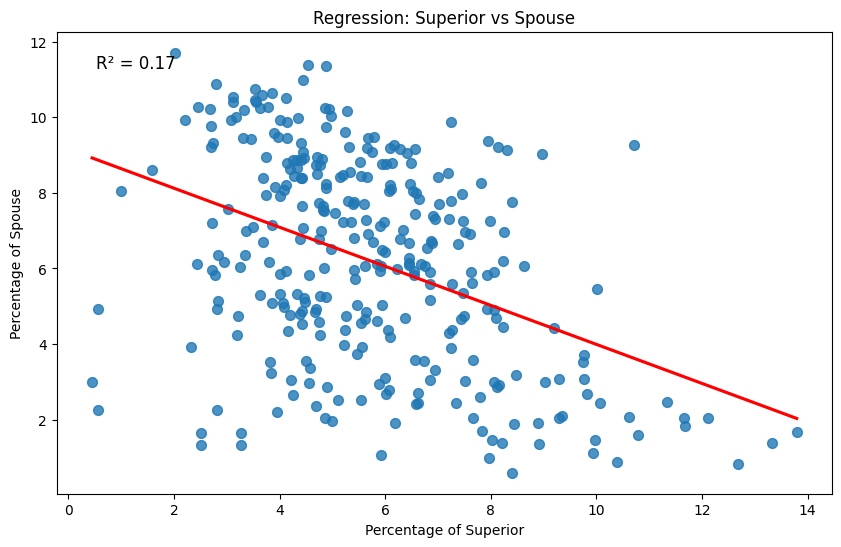

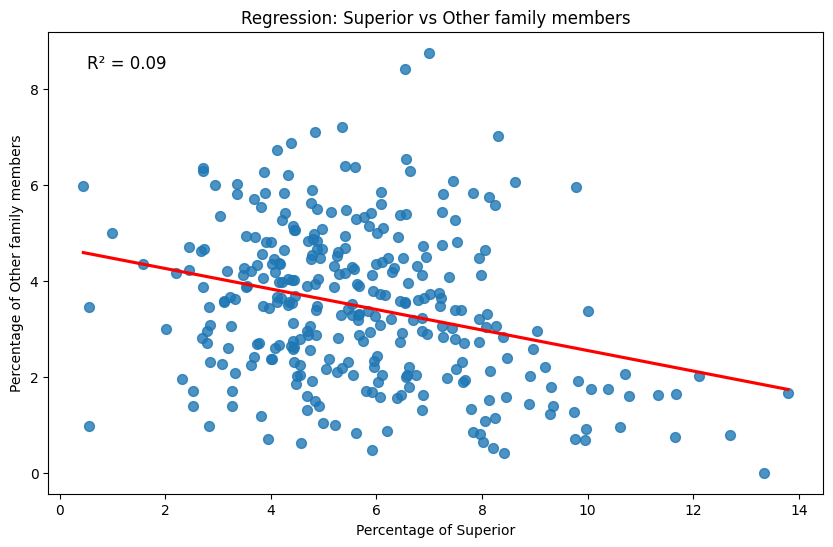

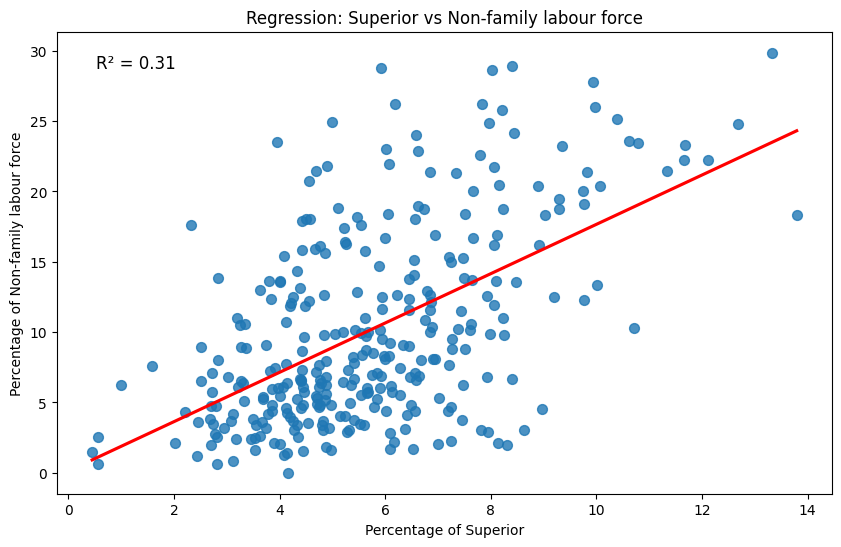

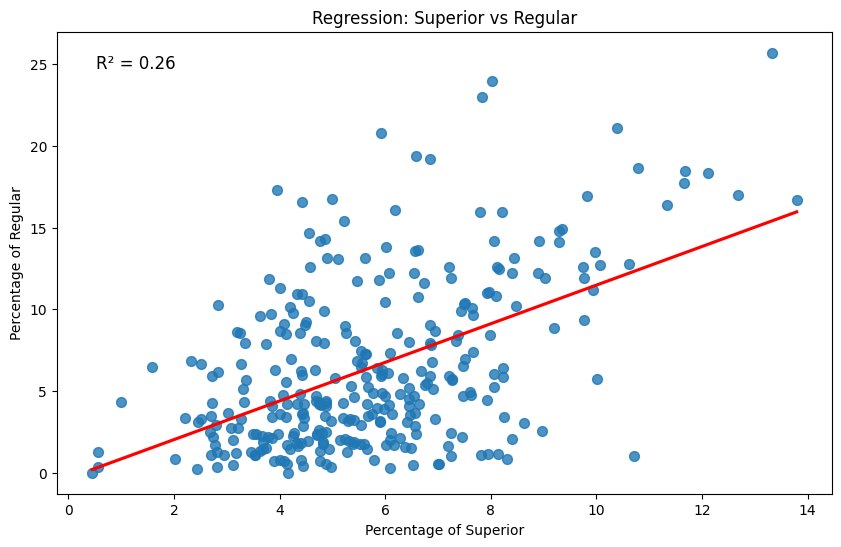

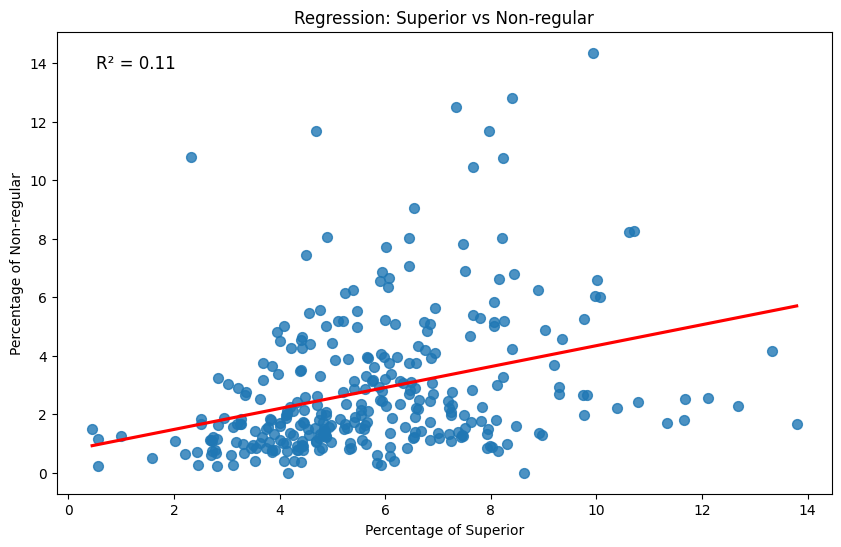

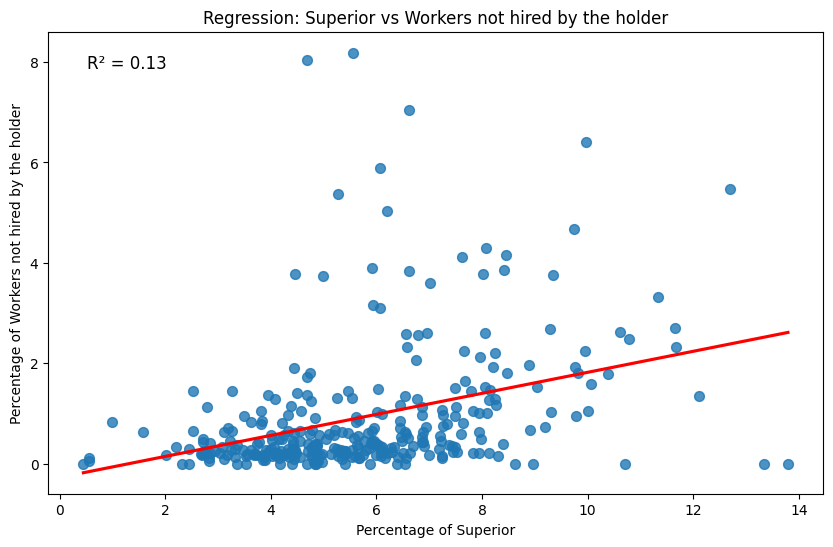

In [775]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Define education levels and types of labor force of interest
niveles_educacion = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']
tipos_labor = ['Total labour force in agriculture', 'Family labour force', 'Holder', 'Spouse',
               'Other family members', 'Non-family labour force', 'Regular', 'Non-regular',
               'Workers not hired by the holder']

# List to store the results
regression_results = []

# Iterate on each level of education and type of workforce.
for nivel_educacion in niveles_educacion:
    for tipo_labor in tipos_labor:
        # Filter dataframes by education level and type of workforce
        df_educacion_filtrado = education_NUTS4_df[education_NUTS4_df['el.education_level'] == nivel_educacion]
        df_labor_filtrado = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == tipo_labor]
        
        # Combinar los dataframes filtrados usando merge
        df_combinado = pd.merge(df_educacion_filtrado, df_labor_filtrado, on='region_name', how='inner')
        
        # Asegurarse de que haya suficientes datos para realizar el análisis
        if len(df_combinado) > 1:
            # Ajustar el modelo de regresión lineal y calcular R²
            X = df_combinado['percentage_x'].values.reshape(-1, 1)
            y = df_combinado['percentage_y'].values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            
            # Almacenar los resultados en la lista
            regression_results.append({
                'Education Level': nivel_educacion,
                'Type of Labor': tipo_labor,
                'R²': r2
            })
            
            # Crear el scatter plot con línea de regresión
            plt.figure(figsize=(10, 6))
            sns.regplot(x='percentage_x', y='percentage_y', data=df_combinado, ci=None, scatter_kws={'s':50}, line_kws={'color':'red'})
            
            # Añadir R² al gráfico
            plt.text(0.05, 0.95, f'R² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
            
            # Añadir títulos y etiquetas
            plt.title(f'Regression: {nivel_educacion} vs {tipo_labor}')
            plt.xlabel(f'Percentage of {nivel_educacion}')
            plt.ylabel(f'Percentage of {tipo_labor}')
            plt.grid(False)
            

# Create a dataframe from the regression results list
df_regression_results = pd.DataFrame(regression_results)

# Display regression results
print(df_regression_results)
